### O PROBLEMA

`Apresentando o Projeto de Ciência de Dados da Blocker Fraud Company: Detecção Avançada de Fraudes Bancárias`

Estamos entusiasmados em apresentar nosso mais recente projeto de ciência de dados: a Detecção Avançada de Fraudes Bancárias da Blocker Fraud Company. Neste projeto, estamos trabalhando arduamente para combater fraudes no setor bancário e proteger os ativos financeiros de nossos clientes de maneira eficaz e inovadora.

`O Desafio da Detecção de Fraudes em Meio ao Sigilo dos Dados`

Um dos maiores desafios que enfrentamos é a obtenção de dados relevantes para treinar nosso modelo de detecção de fraudes. Compreendemos que a segurança e o sigilo dos dados dos clientes são de extrema importância. Essa preocupação impede o acesso direto aos dados reais das transações, o que torna a obtenção de informações significativas uma tarefa complexa.

`Utilizando Dados de Simulação da PaySim para Desenvolver um Modelo Robusto`

Para superar essa dificuldade, optamos por utilizar uma base de dados fornecida publicamente pela PaySim. A PaySim é uma empresa especializada em criar simuladores de transações bancárias com dados reais, porém anonimizados. Isso nos permite estudar e treinar nosso modelo em um ambiente seguro e ético, sem comprometer a privacidade dos clientes.

`Analisando a Eficiência do Modelo`

Com nosso modelo de detecção de fraudes em funcionamento, surgem perguntas cruciais sobre seu desempenho:

* `Precisão e Acurácia:` Quão bem nosso modelo identifica transações fraudulentas? Estamos medindo sua precisão e acurácia para garantir que suas previsões sejam confiáveis e úteis.

* `Confiabilidade na Classificação:` Qual é a confiabilidade do modelo em categorizar transações como legítimas ou fraudulentas? Estamos trabalhando para maximizar a capacidade do modelo em identificar e separar com precisão os dois tipos de transações.

* `Impacto Financeiro:` Se conseguirmos classificar todas as transações usando o modelo, qual seria o faturamento esperado para a empresa? Isso nos ajuda a entender o potencial de ganhos com base na detecção eficiente de fraudes.

* `Prejuízo Esperado:` Por outro lado, qual seria o prejuízo esperado se o modelo falhasse em identificar uma fraude? Estamos avaliando os riscos financeiros associados a falsos negativos.

* `Lucro Esperado:` Com base nos resultados anteriores, podemos estimar o lucro que a Blocker Fraud Company pode alcançar ao implementar e utilizar o modelo de detecção de fraudes.

Estamos comprometidos em fornecer soluções sólidas e confiáveis para a Blocker Fraud Company, garantindo a segurança financeira de nossos clientes e aprimorando nossa compreensão das complexidades das transações bancárias em um ambiente cada vez mais digital. Juntos, estamos construindo um futuro financeiro mais seguro e protegido.






#### 0.0 IMPORTS

Começamos o projeto com uma pratica simples e organizada que é importar as bibliotecas que iremos trabalhar ao longo de todo esse desafio. Sempre que precisarmos importar uma biblioteca ou uma classe de alguma biblioteca, utilizaremos essa seção.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
from scipy.stats import kurtosis, skew, norm
import math
import statistics
from scipy.stats import chi2
import pickle
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# Models ML
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# split data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Metrics ML
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import sys

pd.set_option('float_format', '{:.2f}'.format)
np.set_printoptions(precision=3, suppress=True)

#### 0.1 - HELPER FUNCTION (FUNÇÕES AUXILIARES)

Aqui utilizaremos Funções que iram nos auxiliar em todo o projeto. Essas funções nos auxiliará diversas vezes, quando precisarmos sempre usar ações repetidamente.

In [3]:
"""Essa função, nos ajuda a rodar um describe executando as medidas Estatisticas como: média, mediana e desvio padrão.

Também nos auxilia a entender as kurtosis e assimetria das nossas variaveis numéricas"""


def show_descriptive_statistical(df):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean)).T
    ct2 = pd.DataFrame(df.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std)).T
    d2 = pd.DataFrame(df.apply(min)).T
    d3 = pd.DataFrame(df.apply(max)).T
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    return m

def compute_metrics(yhat, y_validation, model_name):

    metric = pd.DataFrame(
        {'Model_name': model_name,
         'Balanced_accuracy': balanced_accuracy_score(y_validation, yhat),
         'Precision': precision_score(y_validation, yhat),
         'Recall': recall_score(y_validation, yhat),
         'F1-score': f1_score(y_validation, yhat)
        }, index=[0])

    return metric


def plot_metric(y_true, yhat, model_name):

    matrix = confusion_matrix(y_true, yhat)

     # Formate os valores da matriz de confusão
    formatted_matrix = np.array([[float('{:.3f}'.format(value)) for value in row] for row in matrix])

    # show metric
   # Plote o gráfico usando a matriz de confusão
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(matrix, cmap='Oranges')
    plt.colorbar()

     # Adicione os valores da matriz de confusão como texto nos respectivos locais
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            plt.grid(False)
            plt.annotate('{:.3f}'.format(matrix[i][j]), xy=(j, i), ha='center', va='center', color='black', fontsize=12)

    plt.title(f'Confusion Matrix - {model_name}')
    np.set_printoptions(precision=3, suppress=True)

    # figure with real data
    plt.subplot(1, 3, 2)
    sns.barplot(x=y_true.value_counts().index, y=y_true.value_counts().values, palette=None)
    plt.title('Fraud - Real')
    plt.xlabel('Fraud')
    sns.despine(right=True)

    # figure with prediction
    plt.subplot(1, 3, 3)
    pred = pd.Series(yhat).value_counts()
    sns.barplot(x=pred.index, y=pred.values, palette=None)
    plt.title('Fraud - Prediction')
    plt.xlabel('Prediction')
    sns.despine(right=True);


#### 0.2 - PATH DEFINITION

In [4]:
HOME_PATH = '/home/valmir/Documentos/deteccao_fraude/'
RAW_DATA_PATH = 'data/raw/'
INTERIM_DATA_PATH = 'data/intermediario/'
FIGURE_PATH = 'reports/figures/'


#### 0.3 - LOAD DATA

In [4]:
base_fraude_raw = pd.read_csv(HOME_PATH + RAW_DATA_PATH +'fraud_detection_dataset.csv')
base_fraude_raw.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [ ]:
base_fraude_raw.describe()

In [ ]:
quantidade_abaixo_de_5000 = 0

In [ ]:
# Itera sobre cada valor na lista quantia
for valor in base_fraude_raw['amount']:
    if valor < 10000:
        quantidade_abaixo_de_5000 += 1

print("Quantidade de transações acima de 5000:", quantidade_abaixo_de_5000)

Quantidade de transações acima de 5000: 2131067


In [ ]:
base_fraude_raw.shape

(6362620, 11)

In [ ]:
base_fraude_raw.memory_usage().sum() / 1024**2

533.9724426269531

In [ ]:
base_fraude_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [5]:
# Dividir o dataset em treino e teste
X = base_fraude_raw.drop("isFlaggedFraud", axis=1)  # Certifique-se de ajustar a coluna alvo correta
y = base_fraude_raw["isFlaggedFraud"]  # Coluna alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Nomear as bases de treino e teste
base_fraude_raw_train = pd.concat([X_train, y_train], axis=1)
base_fraude_raw_teste = pd.concat([X_test, y_test], axis=1)

In [ ]:
base_fraude_raw_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3224891,250,CASH_OUT,227219.20,C916408517,118.00,0.00,C291939679,1527708.01,1754927.21,0,0
2591475,207,TRANSFER,423626.34,C2052529048,139028.00,0.00,C1512128082,220832.48,644458.81,0,0
5117333,356,CASH_OUT,66288.69,C322110662,0.00,0.00,C2082398128,93668.86,159957.55,0,0
3916982,284,PAYMENT,17290.78,C1225497219,0.00,0.00,M2089471997,0.00,0.00,0,0
4679039,331,CASH_IN,138343.19,C288737786,10460519.82,10598863.00,C1963606245,1174775.23,1036432.04,0,0


## 1.0 - DATA DESCRIPITION

In [6]:
base_fraude_raw1 = base_fraude_raw_train.copy()
base_fraude_raw1.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw1.csv')
base_fraude_raw1 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw1.csv')


In [7]:
base_fraude_raw_teste.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw_teste')

### 1.1 - DATA FIELD'S

Os dados contidos nesta base de dados são simulados e compreendem 30 dias. Estas transações podem ser de diferentes tipo e foram executadas via mobile devices. As features contidas nesta base de dados são:

 * `step` - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744(31
  dias);

 * `type`: Tipo: tipo de transação(depósito, saque, débito, pagamento e transferencia);

 * `amount`: Quantia: total que foi transacionado;

 * `nameOring`: ClienteOrigem: cliente que iniciou atransação;

 * `oldbalanceOrg`: SaldoInicialOrigem: saldo da conta de origem antes da transação;

 * `newbalanceOrig`: SaldoFinalOrigem: saldo da conta de origem depois da transação;

 * `nameDest`: ClienteDestino: cliente de destino da transação;

 * `oldbalandeDestino`: SaldoInicialDestino: saldo da conta destino antes da transação;

 * _`newbalanceDest`_: SaldoFinalDestino: saldo da conta destino depois da transação;

 * `isFraud`: Fraude: flag que define se a transação é fraudolenta ou não. Nesta simulação de fraude é a assumir se 'a conta do usuario foi   esvaziada e transferindo o dinherio para outra conta e depois sacado

 * `IssFlaggedFraud`: SinalizadaFraude: automaticamente categorizada como fraude pelo banco por fraude por tentar trasnferir mais de 200 mil em uma única conta


### 1.2 - RENAME COLUMNS

In [8]:
base_fraude_raw1.rename(columns={'step':'Tempo', 'type':'Tipo', 'amount': 'Quantia',
                                'nameOrig':'ClienteOrigem', 'oldbalanceOrg': 'SaldoInicalOrig',
                                'newbalanceOrig':'SaldoFinalOrig', 'nameDest':'ClienteDest',
                                'oldbalanceDest':'SaldoInicialDest', 'newbalanceDest':'SaldoFinalDest',
                                'isFraud':'Fraude'}, inplace=True)


### 1.3 - DATA DIMENSIONS

In [9]:
num_linhas, num_colunas = base_fraude_raw1.shape

print('Numero de linhas', num_linhas)
print('Numero de colunas', num_colunas)

Numero de linhas 5090096
Numero de colunas 12


### 1.4 - DATA TYPES

In [ ]:
#base_fraude_categoria = base_fraude_raw1[['Tipo','ClienteDest', 'ClienteOrigem']].astype('category')
base_fraude_raw1.dtypes

Unnamed: 0            int64
Tempo                 int64
Tipo                 object
Quantia             float64
ClienteOrigem        object
SaldoInicalOrig     float64
SaldoFinalOrig      float64
ClienteDest          object
SaldoInicialDest    float64
SaldoFinalDest      float64
Fraude                int64
isFlaggedFraud        int64
dtype: object

### 1.5 CHANGE TYPE

Não houve nenhuma mudança nos tipos de variaveis nessa etapa, pois todas as features se encontravam com seus tipos bem definidos

### 1.6 - CHECK N.A.

Não foi encontrado nenhum valor nulo nesse Dataset

In [ ]:
base_fraude_raw1.isnull().sum()

Unnamed: 0          0
Tempo               0
Tipo                0
Quantia             0
ClienteOrigem       0
SaldoInicalOrig     0
SaldoFinalOrig      0
ClienteDest         0
SaldoInicialDest    0
SaldoFinalDest      0
Fraude              0
isFlaggedFraud      0
dtype: int64

In [ ]:
base_fraude_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090096 entries, 0 to 5090095
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   Tempo             int64  
 2   Tipo              object 
 3   Quantia           float64
 4   ClienteOrigem     object 
 5   SaldoInicalOrig   float64
 6   SaldoFinalOrig    float64
 7   ClienteDest       object 
 8   SaldoInicialDest  float64
 9   SaldoFinalDest    float64
 10  Fraude            int64  
 11  isFlaggedFraud    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 466.0+ MB


### 1.7 - FILL OUT N.A.

Não havendo nenhum valor faltante nesse Dataset, não foi nescessario nenhum metodo de preenchimento ou exclusão dos mesmos

### 1.8 DISCRIPTIVE STATISTICAL

In [ ]:
num_attributes = base_fraude_raw1.select_dtypes(include=['int64', 'float64'])
cat_attributes = base_fraude_raw1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])



Medidas de tendencia central -
 - Media
 - Mediana


Medidas de Dispersão

- Skewness
- Kurtosis
- Desvio Padrão
- Range (alcance)
- Min
- Max

#### 1.8.1 - NUMERIC ESTATISTIC

In [ ]:
m = show_descriptive_statistical(num_attributes).T
m

,0,1,2,3,4,5,6,7,8
attributes,Unnamed: 0,Tempo,Quantia,SaldoInicalOrig,SaldoFinalOrig,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,6362619.00,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00
range,6362619.00,742.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00
mean,3180794.07,243.36,179689.36,833877.24,855137.83,1100854.73,1224850.15,0.00,0.00
median,3180486.50,239.00,74880.11,14225.98,0.00,132793.77,214630.02,0.00,0.00
std,1836694.27,142.31,599525.59,2889464.08,2925221.56,3406029.78,3678826.09,0.04,0.00
skew,0.00,0.37,30.61,5.25,5.18,20.11,19.54,27.77,625.73
kurtosis,-1.20,0.33,1766.57,33.04,32.12,965.14,879.24,769.40,391541.23


In [ ]:
base_fraude_raw1.tail()

,Unnamed: 0,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud
5090091,1529711,153,CASH_OUT,6316.81,C932548269,13170.09,6853.29,C957403414,55310.70,61627.51,0,0
5090092,2664936,210,CASH_IN,234407.84,C1603653167,2469363.66,2703771.50,C1233857577,380160.03,145752.19,0,0
5090093,561307,22,TRANSFER,173515.09,C1011801264,0.00,0.00,C2013882520,233816.00,407331.09,0,0
5090094,2870435,227,PAYMENT,21590.41,C1112535180,0.00,0.00,M1550260310,0.00,0.00,0,0
5090095,3974874,297,CASH_IN,371821.41,C1214871855,12465614.98,12837436.39,C202182200,414630.40,42809.00,0,0


#### 1.8.2 - CATEGORICAL ATRIBUTES



In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0])

Tipo                   5
ClienteOrigem    5084141
ClienteDest      2265806
dtype: int64

## 2.0 - FEATURE ENGINEERING- PARTE I

In [10]:
''' base_fraude_raw2 = base_fraude_raw1.copy()
base_fraude_raw2.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw2.csv') '''
base_fraude_raw2 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw2.csv')

### 2.1 - MAPA MENTAL DE HIPOTESE


### 2.2 - CRIAÇÃO DAS HIPOTESE

### TRANSAÇÕES
 * QUANDO OS VALORES DAS TRANSAÇÕES FOREM MUITO ALTOS OU INCOMUNS EM RELAÇÃO AOS PADRÕES COMUNS DO CLIENTE, SERAM CLASSIFICADOS COMO FRAUDES;

 * QUANDO AS TRANSAÇÕES FOREM REALIZADAS EM HORÁRIOS ATÍPICOS AOS PADRÕES COMUNS REALIZADAS PELO CLIENTE, SERAM CLASSIFICADOS COMO FRAUDES;

 * QUANDO AS TRANSAÇÕES FOREM REALIZADAS EM MOMENTOS DE TEMPO MUITO CURTOS, SERAM CLASSIFICADOS COMO FRAUDES;

 ### COMPORTAMENTO DO CLIENTE
 * QUANDO HOUVER MUDANÇAS REPENTINAS DOS VALORES DOS GASTOS E/OU DA FORMA DE TRANSAÇÃO TÍPICA DO CLIENTE, SERAM CLASSIFICADOS COMO FRAUDES;

 * QUANDO AS TRANSAÇÕES MUDAREM REPENTINAMENTE DO TIPO DA CATEGORIA QUE O CLIENTE EVENTUALMENTE REALIZA, SERAM CLASSIFICADOS COMO FRAUDES;

 * QUANDO HOUVER A TROCA DESORDENADA DO CARTÃO QUE O CLIENTE UTILIZA EVENTUALMENTE EM SUAS TRANSAÇÕES, SERAM CLASSIFICADOS COMO FRAUDES;

 ### DADOS DE AUTENTICAÇÃO
 * QUANDO HOUVER MULTIPLAS TENTATIVAS ERRADAS, SOLICITAÇÃO DE NOVA SENHA ANTES DO CLIENTE CONSEGUIR LOGAR, SERAM CLASSIFICADOS COMO FRAUDES;

 ### TRANSAÇÕES SUSPEITAS
 * QUANDO HOUVER TRANSFERENCIAS PARA CONTAS DIVERSAS DAS HABITUAIS REALIZADAS PELO CLIENTE, SERAM CLASSIFICADOS COMO FRAUDES;

 * QUANDO HOUVER TRANSFERENCIAS PARA CONTAS INTERNACIONAIS COM FREQUENCIAS DE CURTO ESPAÇO DE TEMPO, SERAM CLASSIFICADOS COMO FRAUDES;


### 2.3 - LISTA FINAL DE HIPOTESE

### TRANSAÇÕES
 * QUANDO OS VALORES DAS TRANSAÇÕES FOREM MAIORES QUE 50% DO SALDO INICIAL, SERAM CLASSIFICADOS COMO FRAUDES;

 * QUANDO AS TRANSAÇÕES FOREM REALIZADAS EM MOMENTOS DE TEMPO MUITO CURTOS, SERAM CLASSIFICADOS COMO FRAUDES;

 ### COMPORTAMENTO DO CLIENTE
 * OS CLIENTES QUE TIVEREM PODER AQUISITIVO ALTO, ONDE A MEDIA SALARIAL AMERICA CONSTADA É DE $ 3.800,00, SERAM CLASSIFICADOS COMO FRAUDES;

 ### TRANSAÇÕES SUSPEITAS
 * APÓS CLASSIFICADOS OS TIPOS CLIENTES DE ORIGEM E CLIENTES DE DESTINO DE C PARA CLIENTES COMUNS E M PARA ORGANIZAÇÕES, AS TRANSAÇÕES SUSPEITAS QUE CONSIDRERAM COMO FRAUDES SERÃO AS DE CLIENTES PARA CLIENTES;



### 2.4 - FEATURE ENGINEERING - PARTE 1

In [ ]:
base_fraude_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090096 entries, 0 to 5090095
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0.1      int64  
 1   Unnamed: 0        int64  
 2   Tempo             int64  
 3   Tipo              object 
 4   Quantia           float64
 5   ClienteOrigem     object 
 6   SaldoInicalOrig   float64
 7   SaldoFinalOrig    float64
 8   ClienteDest       object 
 9   SaldoInicialDest  float64
 10  SaldoFinalDest    float64
 11  Fraude            int64  
 12  isFlaggedFraud    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 504.8+ MB


`TRANSAÇÕES FOREM MAIORES QUE 50% DO SALDO INICIAL? `

Criei uma Feature chamada "MAIOR_50%" para classificar como yes e no para transações acima de 50% do Saldo Original;

`PODER AQUISITIVO DOS CLIENTES? `

Criei uma Feature chamada "PODER_COMPRA" para classificar como ALTA, MÉDIO E BAIXA o poder aquisitivo dos clientes baseado na média salarial americana que seria de $3.800,00 sobre o saldo inicial dos clientes;

`CLASSIFICADOS OS TIPOS CLIENTES DE ORIGEM E CLIENTES DE DESTINO DE C PARA CLIENTES COMUNS E M PARA ORGANIZAÇÕES, AS TRANSAÇÕES SUSPEITAS QUE CONSIDRERAM COMO FRAUDES SERÃO AS DE CLIENTES PARA CLIENTES; `

Criei uma Feature chamada "TIPO_TRANSACAO" para classificar como C e M, onde C seriam clientes comuns e M seriam clientes organizacionais.

In [11]:
base_fraude_raw2['maior_50%'] = base_fraude_raw2[['Quantia', 'SaldoInicalOrig']].apply(
    lambda x: 'yes' if x['Quantia'] / 2 > x['SaldoInicalOrig'] else 'no', axis=1)


base_salarial = 3800
media_salarial = base_fraude_raw2['SaldoInicalOrig'].median()

base_fraude_raw2['poder_compra'] = base_fraude_raw2['SaldoInicalOrig'].apply(
    lambda x: 'baixa' if x <= base_salarial else 'medio'
                      if x > base_salarial and x <= media_salarial else 'alta')


base_fraude_raw2['tipo_transacao'] = base_fraude_raw2[['ClienteOrigem', 'ClienteDest']].apply(
    lambda x: 'C para C' if x['ClienteOrigem'][0] == 'C' and x['ClienteDest'][0] == 'C' else 'M para M'
                         if x['ClienteOrigem'][0] == 'M' and x['ClienteDest'][0] == 'M' else 'C para M'
                         if x['ClienteOrigem'][0] == 'C' and x['ClienteDest'][0] == 'M' else 'M para C'
                         if x['ClienteOrigem'][0] == 'M' and x['ClienteDest'][0] == 'C' else None, axis=1)

In [21]:
base_fraude_raw2.head()

,Unnamed: 0.1,Unnamed: 0,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
0,0,3224891,250,CASH_OUT,227219.20,C916408517,118.00,0.00,C291939679,1527708.01,1754927.21,0,0,yes,baixa,C para C
1,1,2591475,207,TRANSFER,423626.34,C2052529048,139028.00,0.00,C1512128082,220832.48,644458.81,0,0,yes,alta,C para C
2,2,5117333,356,CASH_OUT,66288.69,C322110662,0.00,0.00,C2082398128,93668.86,159957.55,0,0,yes,baixa,C para C
3,3,3916982,284,PAYMENT,17290.78,C1225497219,0.00,0.00,M2089471997,0.00,0.00,0,0,yes,baixa,C para M
4,4,4679039,331,CASH_IN,138343.19,C288737786,10460519.82,10598863.00,C1963606245,1174775.23,1036432.04,0,0,no,alta,C para C


### 3.0 - FILTRAGEM DE VARIAVEIS

In [22]:
base_fraude_raw3 = base_fraude_raw2.copy()
base_fraude_raw3.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw3.csv')
base_fraude_raw3 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw3.csv')

In [20]:
base_fraude_raw3.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
0,0,0,3224891,250,CASH_OUT,227219.20,C916408517,118.00,0.00,C291939679,1527708.01,1754927.21,0,0,yes,baixa,C para C
1,1,1,2591475,207,TRANSFER,423626.34,C2052529048,139028.00,0.00,C1512128082,220832.48,644458.81,0,0,yes,alta,C para C
2,2,2,5117333,356,CASH_OUT,66288.69,C322110662,0.00,0.00,C2082398128,93668.86,159957.55,0,0,yes,baixa,C para C
3,3,3,3916982,284,PAYMENT,17290.78,C1225497219,0.00,0.00,M2089471997,0.00,0.00,0,0,yes,baixa,C para M
4,4,4,4679039,331,CASH_IN,138343.19,C288737786,10460519.82,10598863.00,C1963606245,1174775.23,1036432.04,0,0,no,alta,C para C


### 3.1 - FILTRAGEM DE LINHAS
Devido termos poucas colunas a quantidade de linhas farão toda a diferença, visto que não possuimos valores nulos e o valores `0` em algumas

linhas são afirmações de `NÃO TRANSAÇÃO`, impactando assim, diretamente nos resultados finais.

In [ ]:
"""ANALISAMOS QUE A FORMA DE PAGAMENTO QUE MAIS POSSUI FRAUDES SÃO CASH_OUT E TRANSFER.
SABENDO DISSO, REDUZIMOS O DATASET APENAS PARA AS TRANSAÇÕES DE CASH_OUT E TRANSFER
QUE SÃO CONSIDERADAS FRAUDES. COM ISSO, NÃO DESPREZAMOS AS TRANSAÇÕES QUE NÃO SÃO
FRAUDES."""

"""base_fraude_real = base_fraude_raw4[base_fraude_raw4['Fraude'] == 1]"""
tipos_fraude = ["CASH_OUT", "TRANSFER"]
base_fraude_real = base_fraude_raw3[base_fraude_raw3['Tipo'].isin(tipos_fraude)]
base_fraude_real.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
0,0,0,3224891,250,CASH_OUT,227219.20,C916408517,118.00,0.00,C291939679,1527708.01,1754927.21,0,0,yes,baixa,C para C
1,1,1,2591475,207,TRANSFER,423626.34,C2052529048,139028.00,0.00,C1512128082,220832.48,644458.81,0,0,yes,alta,C para C
2,2,2,5117333,356,CASH_OUT,66288.69,C322110662,0.00,0.00,C2082398128,93668.86,159957.55,0,0,yes,baixa,C para C
5,5,5,2712625,211,CASH_OUT,124203.80,C1864920124,0.00,0.00,C1509219790,590331.46,714535.26,0,0,yes,baixa,C para C
8,8,8,3231666,250,CASH_OUT,89964.85,C75276080,0.00,0.00,C1287473408,154837.20,244802.04,0,0,yes,baixa,C para C


## 3.2 - FILTRAGEM DE COLUNAS - SELEÇÃO DAS COLUNAS

Devido termos poucas colunas a quantidade de linhas farão toda a diferença, visto que não possuimos valores nulos e o valores `0` em algumas

linhas são afirmações de `NÃO TRANSAÇÃO`, impactando assim, diretamente nos resultados finais.

In [ ]:
base_fraude_raw3.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
0,0,0,3224891,250,CASH_OUT,227219.20,C916408517,118.00,0.00,C291939679,1527708.01,1754927.21,0,0,yes,baixa,C para C
1,1,1,2591475,207,TRANSFER,423626.34,C2052529048,139028.00,0.00,C1512128082,220832.48,644458.81,0,0,yes,alta,C para C
2,2,2,5117333,356,CASH_OUT,66288.69,C322110662,0.00,0.00,C2082398128,93668.86,159957.55,0,0,yes,baixa,C para C
3,3,3,3916982,284,PAYMENT,17290.78,C1225497219,0.00,0.00,M2089471997,0.00,0.00,0,0,yes,baixa,C para M
4,4,4,4679039,331,CASH_IN,138343.19,C288737786,10460519.82,10598863.00,C1963606245,1174775.23,1036432.04,0,0,no,alta,C para C


In [ ]:
del base_fraude_real['Unnamed: 0']
del base_fraude_real['Unnamed: 0.1']
del base_fraude_real['Unnamed: 0.2']

## 4.0 - ANALISE E VISUALIZAÇÕES

In [ ]:
''' base_fraude_raw4 = base_fraude_real.copy()
base_fraude_raw4.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw4.csv') '''
base_fraude_raw4 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw4.csv')

In [ ]:
base_fraude_raw4.memory_usage().sum() / 1024**2

253.66036224365234

### 4.1 - Amostragem Estratificada Uniforme

In [ ]:
n_samples = 8000

# Dividindo o conjunto de dados em estratos com base na variável 'isFraud'
estratos = base_fraude_raw4.groupby('Fraude')

In [ ]:
# Selecionando um número igual de amostras de cada estrato
amostra_uniforme = pd.concat([estrato.sample(n=n_samples, replace=True) for _, estrato in estratos])

# Agora, amostra_uniforme é uma amostra estratificada uniforme do conjunto de dados original
amostra_uniforme.shape

''' amostras_uniformes = []

# Realizando amostragem uniforme de cada estrato
for _, grupo in estratos:
    if len(grupo) <= n_samples:
        amostras_uniformes.append(grupo)
    else:
        amostra_uniforme = grupo.sample(n=n_samples, replace=False)
        amostras_uniformes.append(amostra_uniforme)

# Criando um DataFrame com amostras uniformes de todos os estratos
amostra_uniforme_final = pd.concat(amostras_uniformes) '''

' amostras_uniformes = []\n\n# Realizando amostragem uniforme de cada estrato\nfor _, grupo in estratos:\n    if len(grupo) <= n_samples:\n        amostras_uniformes.append(grupo)\n    else:\n        amostra_uniforme = grupo.sample(n=n_samples, replace=False)\n        amostras_uniformes.append(amostra_uniforme)\n\n# Criando um DataFrame com amostras uniformes de todos os estratos\namostra_uniforme_final = pd.concat(amostras_uniformes) '

In [18]:
del amostra_uniforme['Unnamed: 0']
amostra_uniforme.head(5)

KeyError: 'Unnamed: 0'

#### 4.1.1 - SALVAR BASE DE AMOSTRAGEM COM PICKLE

In [ ]:
with open('amostra_uniforme.pkl', mode = 'wb') as f:
    pickle.dump(amostra_uniforme,f)

In [13]:
with open('/home/valmir/Documentos/deteccao_fraude/data/raw/amostra_uniforme.pkl', 'rb') as f:
    amostra_uniforme = pickle.load(f)

### 4.2 - Análise e Visualização Univariada

In [ ]:
# Figure
plt.figure(figsize=(8, 3))
sns.countplot(x='SinalizadaFraude', data=amostra_uniforme, palette=None)
sns.despine(right=True)
plt.title('Distribuição - Target');

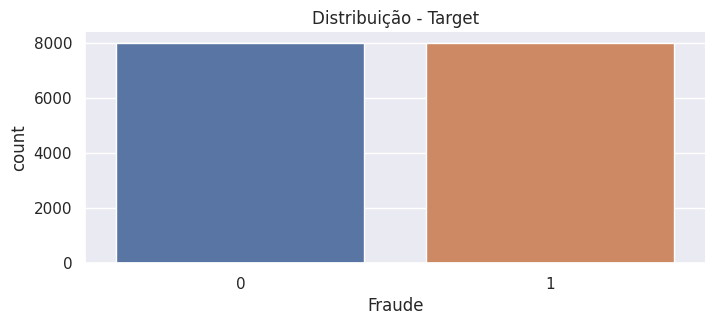

In [ ]:
# Figure
plt.figure(figsize=(8, 3))
sns.countplot(x='Fraude', data=amostra_uniforme, palette=None)
sns.despine(right=True)
plt.title('Distribuição - Target');

### 4.3 - Análise e Visualização Bivariada

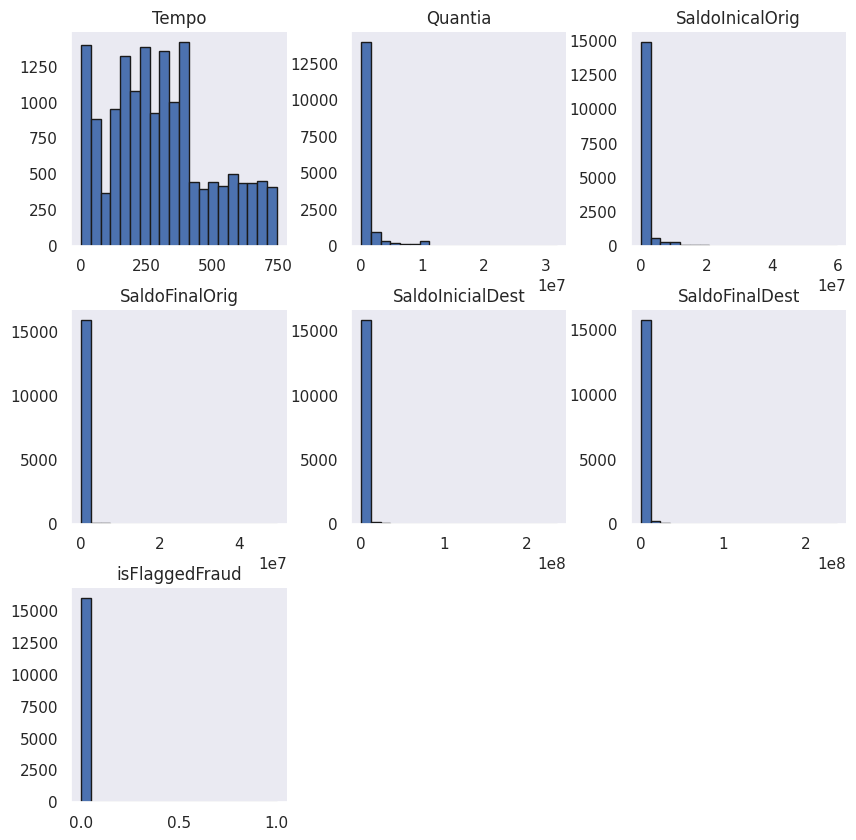

In [ ]:
# Filter numerical atributes
num = amostra_uniforme.select_dtypes(include=['int64', 'float64']).drop(columns=['Fraude'])

# Figure
num.hist(grid=False, bins=20, ec='k', figsize=(10, 10))
sns.despine(right=True)
plt.title('Dsitribuição Variaveis Numéricas');

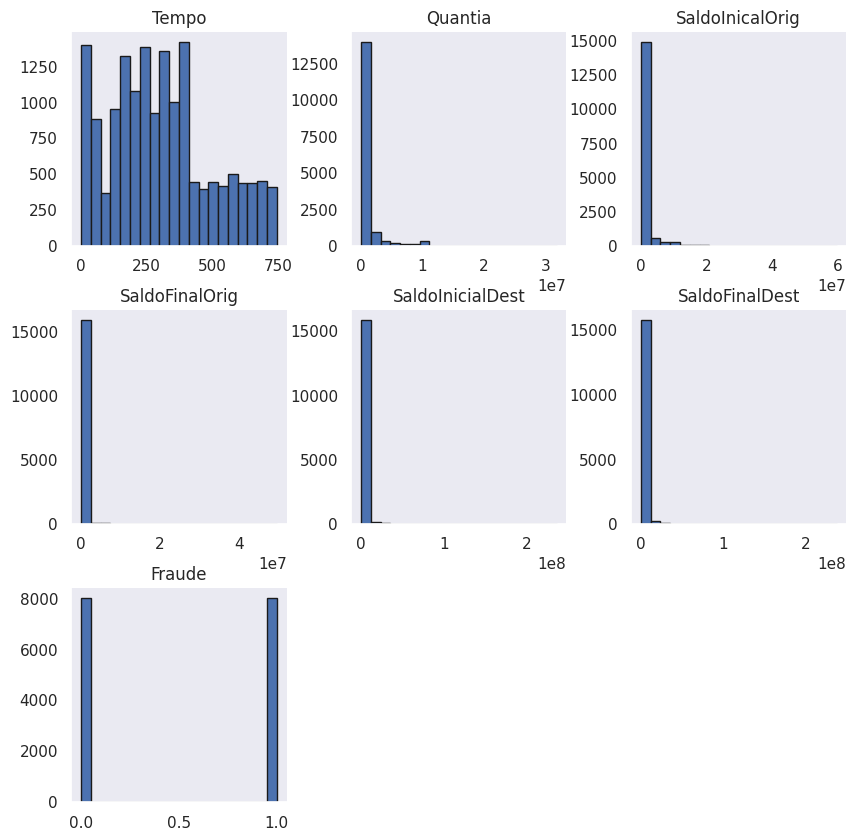

In [ ]:
# Filter numerical atributes
num = amostra_uniforme.select_dtypes(include=['int64', 'float64']).drop(columns=['isFlaggedFraud'])

# Figure
num.hist(grid=False, bins=20, ec='k', figsize=(10, 10))
sns.despine(right=True)
plt.title('Dsitribuição Variaveis Numéricas');

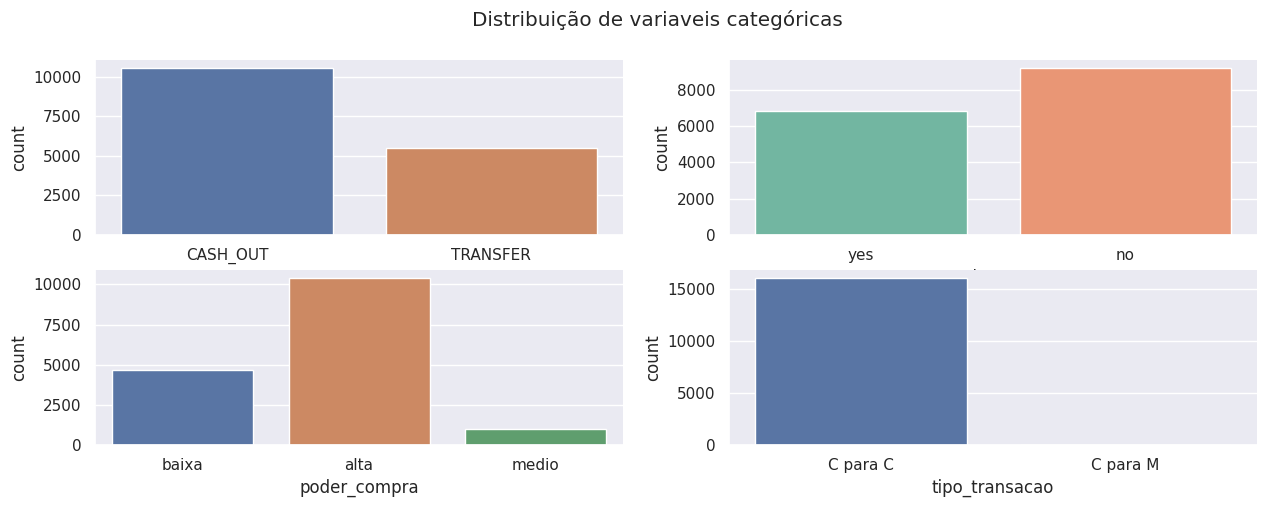

In [ ]:
# Filter categorical atributes
cat = amostra_uniforme.select_dtypes(include=['object'])

# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
sns.countplot(x='Tipo', data=cat, order=list(cat['Tipo'].value_counts().sort_values(ascending=False).index), palette= None)
plt.suptitle('Distribuição de variaveis categóricas')
sns.despine(right=True)
# Figure 2
plt.subplot(2, 2, 2)
sns.countplot(x='maior_50%', data=cat, order=['yes', 'no'], palette= "Set2")
sns.despine(right=True)

# Figure 3
plt.subplot(2, 2, 3)
sns.countplot(x='poder_compra', data=cat, palette=None)
sns.despine(right=True)

# Figure 4
plt.subplot(2, 2, 4)
sns.countplot(x='tipo_transacao', data=cat, order=['C para C', 'C para M'], palette=None)
sns.despine(right=True);

`Insight:`
* Com a amostra balanceada da base, analisando as transações fraudulentas, percebemos que os tipos de transações são os únicos numeros de casos são CASH_OUT e TRANSFERENCIA.
* Com a amostra balanceada da base, analisando o saldo inicial, constatamos que a maioria das pessoas realizam as transações menores que 50% do valor delas em seus saldos iniciais.
* Com a amostra balanceada da base, analisando o poder de compra, pela media salarial de $ 3.800,00, é alto o poder aquisitivo.
* Com a amostra balanceada da base, conseguimos categorizar o tipo de transação entre clientes e empresas e a grande maioria das fraudes são realizadas de clientes para clientes.

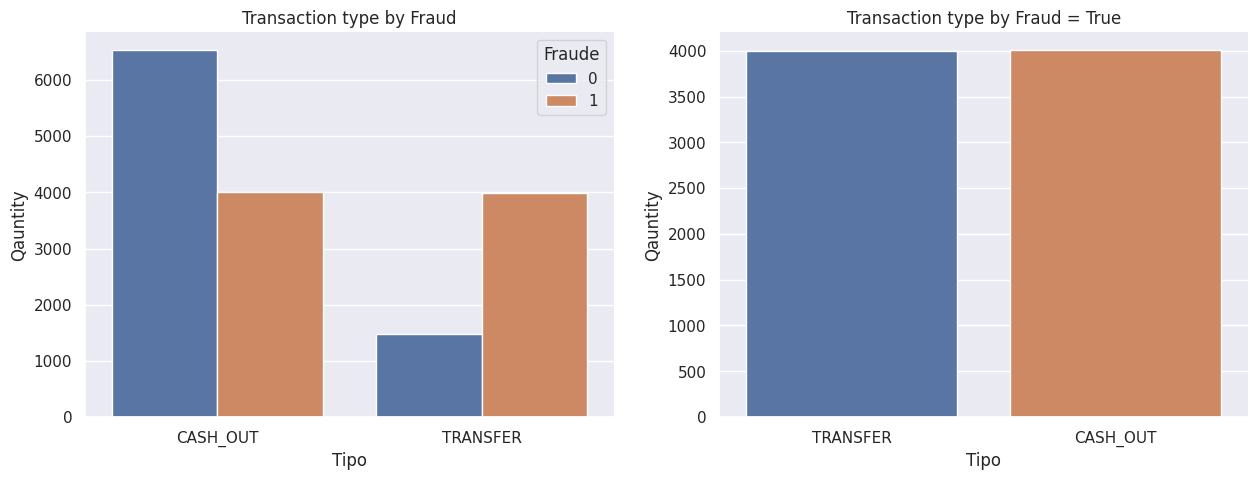

In [ ]:
# figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Tipo', data=amostra_uniforme, hue='Fraude', palette=None)
plt.ylabel('Qauntity')
plt.title('Transaction type by Fraud')
sns.despine(right=True)

# figure 2
plt.subplot(1, 2, 2)
filter_fraud = amostra_uniforme[amostra_uniforme['Fraude'] == 1]
sns.countplot(x='Tipo', data=filter_fraud, palette=None)
plt.ylabel('Qauntity')
plt.title('Transaction type by Fraud = True')
sns.despine(right=True);

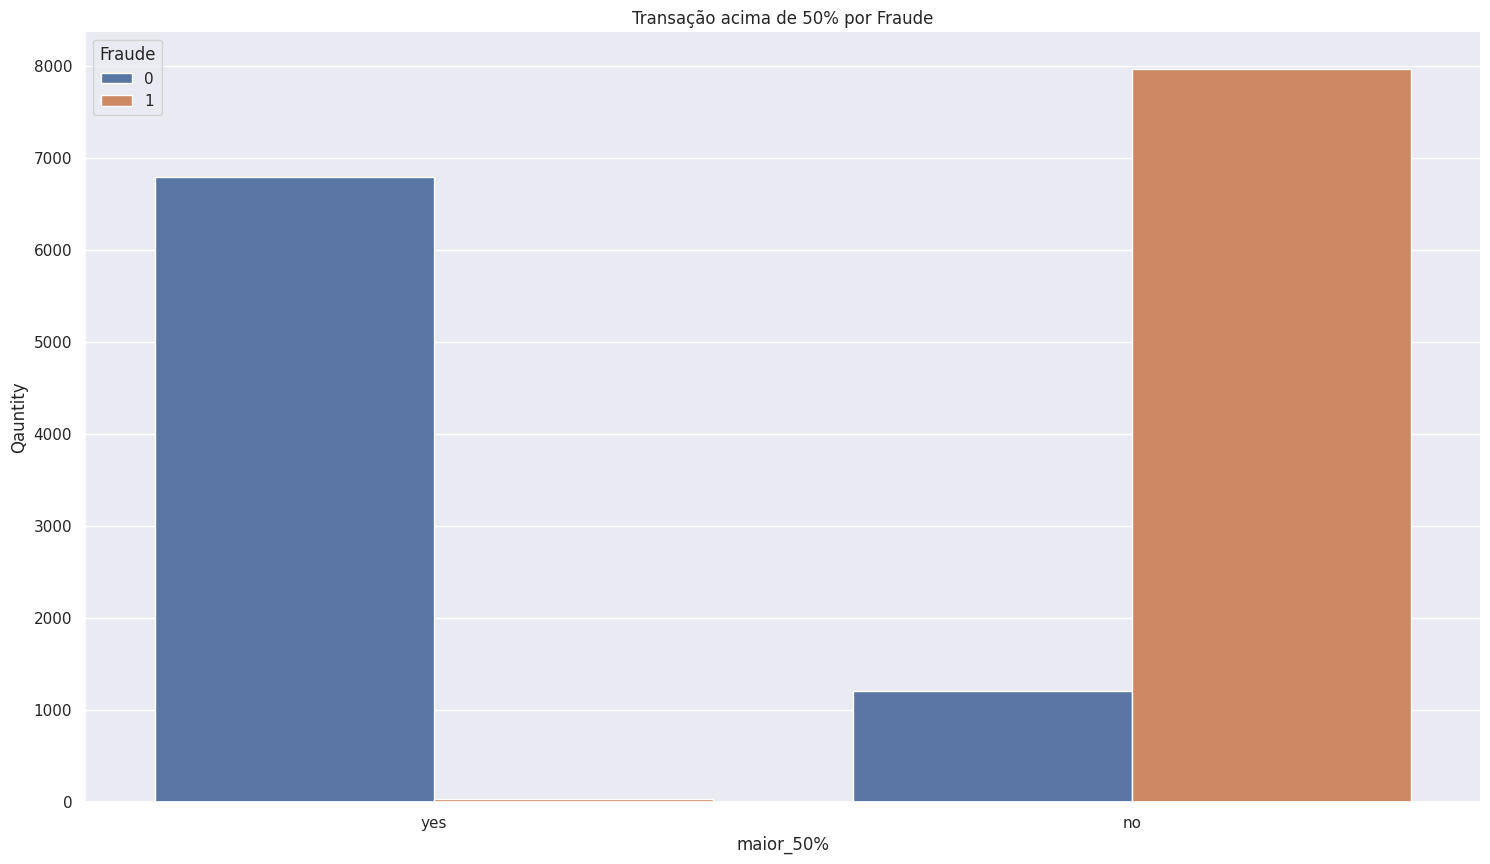

In [ ]:
plt.figure(figsize=(18, 10))
sns.countplot(x='maior_50%', data=amostra_uniforme, hue='Fraude', palette=None)
plt.ylabel('Qauntity')
plt.title('Transação acima de 50% por Fraude')
sns.despine(right=True);


* Verifiamos que as transações maiores que 50% do Saldo Inicial NÃO são fraudes

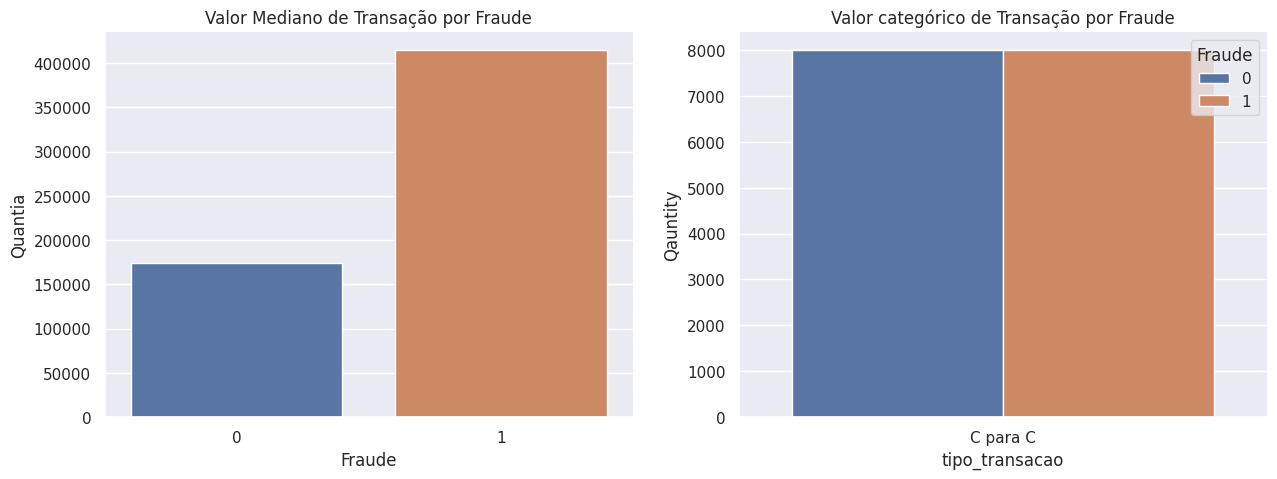

In [ ]:
median_group = amostra_uniforme['Quantia'].groupby(amostra_uniforme['Fraude']).median().reset_index()

# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Fraude', y='Quantia', data=median_group, palette=None)
plt.title('Valor Mediano de Transação por Fraude')
sns.despine(right=True)

# Figure 2
plt.subplot(1, 2, 2)
sns.countplot(x='tipo_transacao', data=amostra_uniforme, hue='Fraude', palette=None)
plt.ylabel('Qauntity')
plt.title('Valor categórico de Transação por Fraude')
sns.despine(right=True);

* Percebemos que as fraudes, possui em seu maios valor acima $400.000,00(quatrocentos mil) e a maioria de Transações normais são de Cliente para Cliente

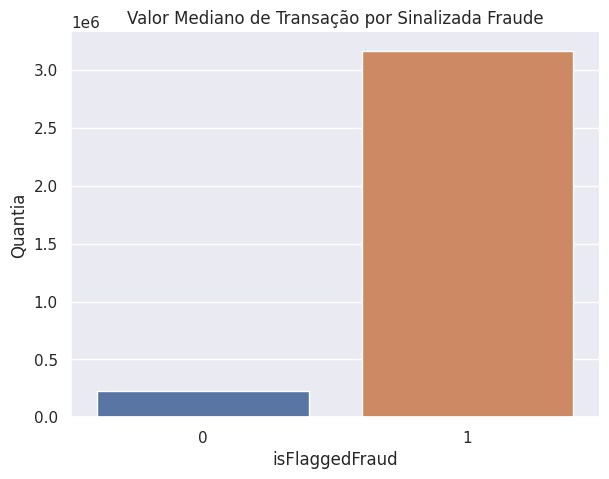

In [ ]:
median_group = amostra_uniforme['Quantia'].groupby(amostra_uniforme['isFlaggedFraud']).median().reset_index()

# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='isFlaggedFraud', y='Quantia', data=median_group, palette=None)
plt.title('Valor Mediano de Transação por Sinalizada Fraude')
sns.despine(right=True)



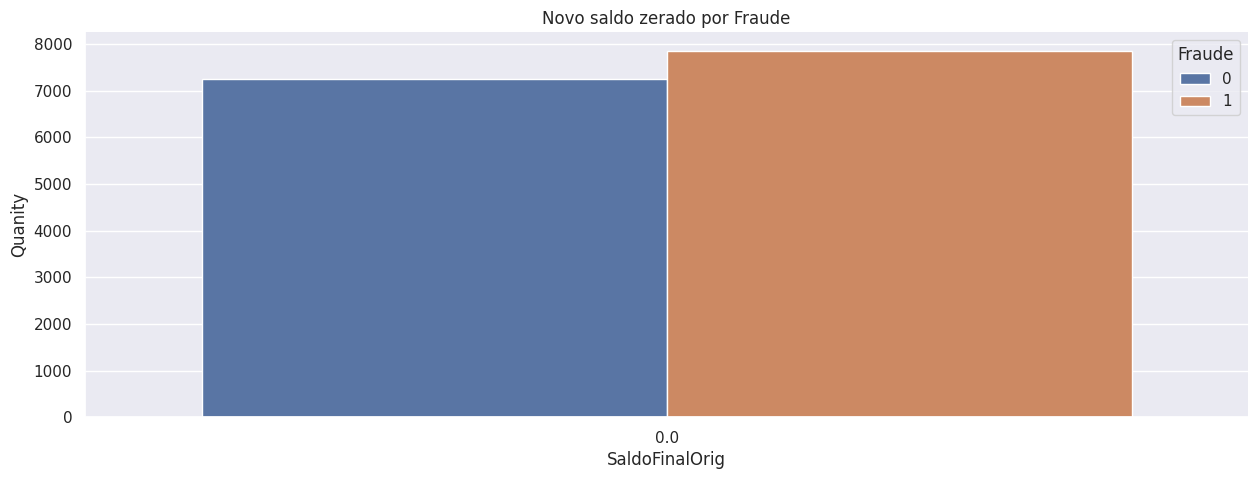

In [ ]:
novovalor_orig_zero = amostra_uniforme[amostra_uniforme['SaldoFinalOrig'] == 0]

plt.figure(figsize=(15, 5))
sns.countplot(x='SaldoFinalOrig', data=novovalor_orig_zero, hue='Fraude', palette=None)
plt.ylabel('Quanity')
plt.title('Novo saldo zerado por Fraude')
sns.despine(right=True);

* As Transações fraudulentas na sua grande maioria, os saldos originais finais são zerados

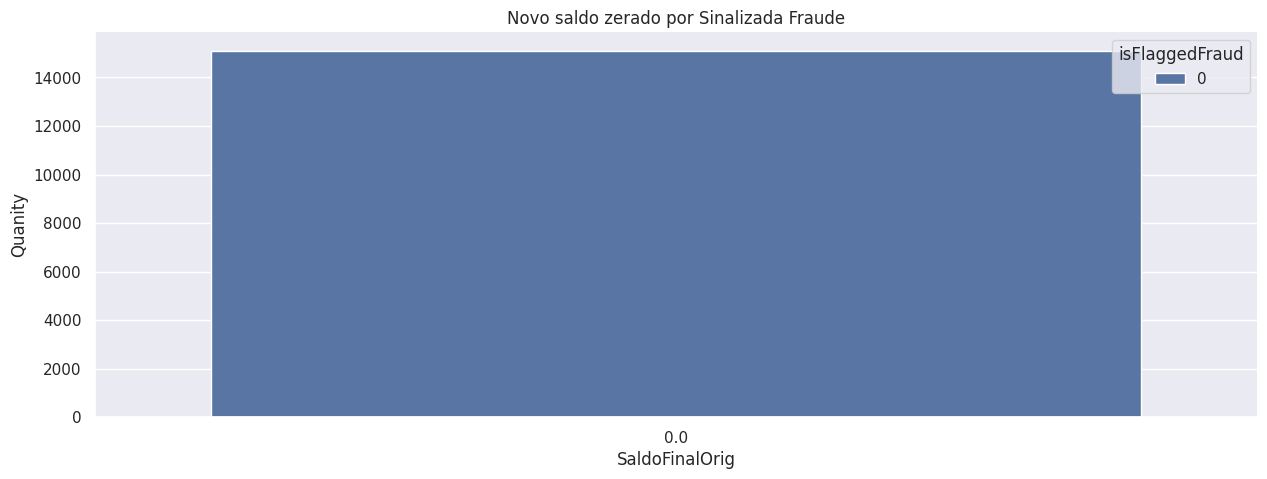

In [ ]:
novovalor_orig_zero = amostra_uniforme[amostra_uniforme['SaldoFinalOrig'] == 0]

plt.figure(figsize=(15, 5))
sns.countplot(x='SaldoFinalOrig', data=novovalor_orig_zero, hue='isFlaggedFraud', palette=None)
plt.ylabel('Quanity')
plt.title('Novo saldo zerado por Sinalizada Fraude')
sns.despine(right=True);

* Interpretamos acima, que o saldo final zerado, como se tirasse tudo depois da fraude, teoria essa apresentada pela a empresa responsavel pelos dados que os classificam Fraude ou Não, não caracteriza Fraude

* Aqui confirmamos que as transações fraudulentas são em sua grande maioria sofridas por clientes de poder aquisitivo ALTO

In [ ]:
fig = px.scatter(amostra_uniforme, x = "Quantia", y = "Fraude", size = "SaldoInicialDest", color = 'poder_compra',
               hover_name = "poder_compra", log_x = True, size_max = 100, width = 900)
fig.update_layout(title = 'Poder aquisitivo por Fraude')
fig.update_xaxes(title = 'FRAUDE')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

* Percebemos que as maiores quantidades de Fraudes, são com clientes de poder aquisitivo Alto, mediando pelo valor de salario de $3.800,00(tre mil e oitocentos)

### 4.4 - Análise e Visualização Multivariada

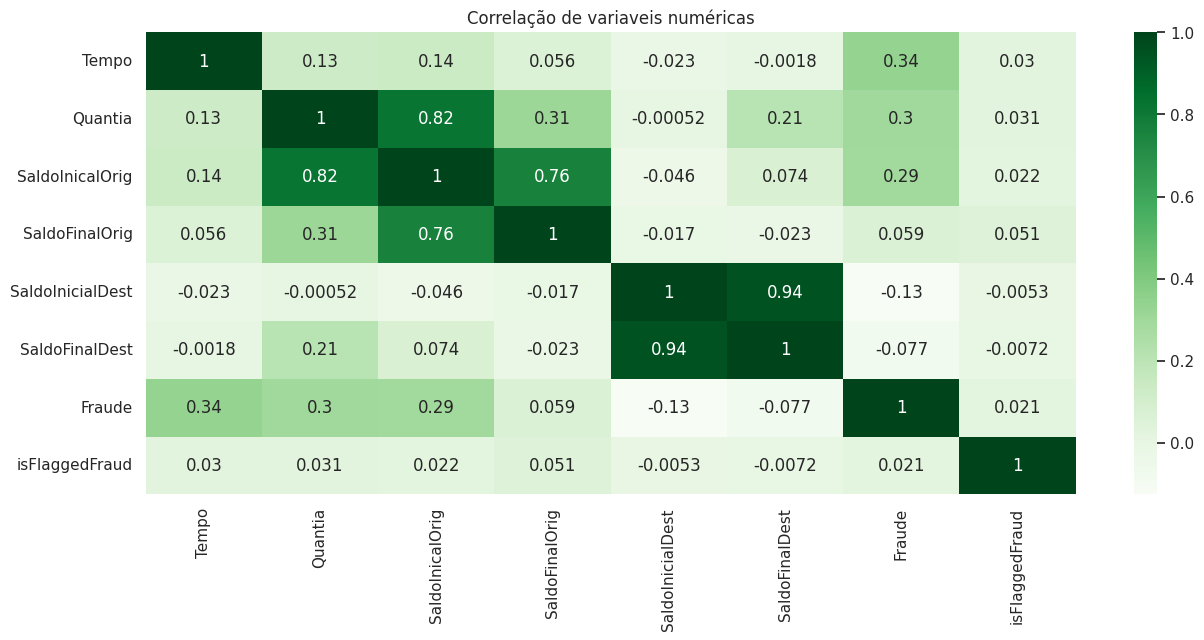

In [ ]:
numerico = amostra_uniforme.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 6))
sns.heatmap(numerico.corr(method='pearson'), annot=True, cmap='Greens')
plt.title('Correlação de variaveis numéricas');

* Existe uma forte correlação entre Saldo Inicial do Destino e Saldo Final do destino.
* Exite também uma correlação negativa entre Saldo Final Cliente e Saldo Inicial do destino

## 5 - PREPARAÇÃO DOS DADOS

In [15]:
"""amostra_uniforme_raw2 = amostra_uniforme.copy()
amostra_uniforme_raw2.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw4.csv')"""
amostra_uniforme_raw2 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw4.csv')

In [30]:
with open('amostra_uniforme_raw_2.pkl', mode = 'wb') as f:
    pickle.dump(amostra_uniforme_raw2,f)

In [26]:
amostra_uniforme_raw2.memory_usage().sum() / 1024**2

1.7091064453125

In [5]:
with open('/home/valmir/Documentos/deteccao_fraude/data/raw/amostra_uniforme_raw_2.pkl', 'rb') as f:
    amostra_uniforme_raw2 = pickle.load(f)

In [6]:
"""del amostra_uniforme_raw2['Unnamed: 0']"""
amostra_uniforme_raw2.dtypes

Passos                int64
Tipo                 object
Quantia             float64
ClienteOrigem        object
SaldoInicalOrig     float64
SaldoFinalOrig      float64
ClienteDest          object
SaldoInicialDest    float64
SaldoFinalDest      float64
Fraude                int64
SinalizadaFraude      int64
maior_50%            object
poder_compra         object
tipo_transacao       object
dtype: object

#### VERIFICAR OS OUTILIERS DAS VARIÁVEIS NUMÉRICAS

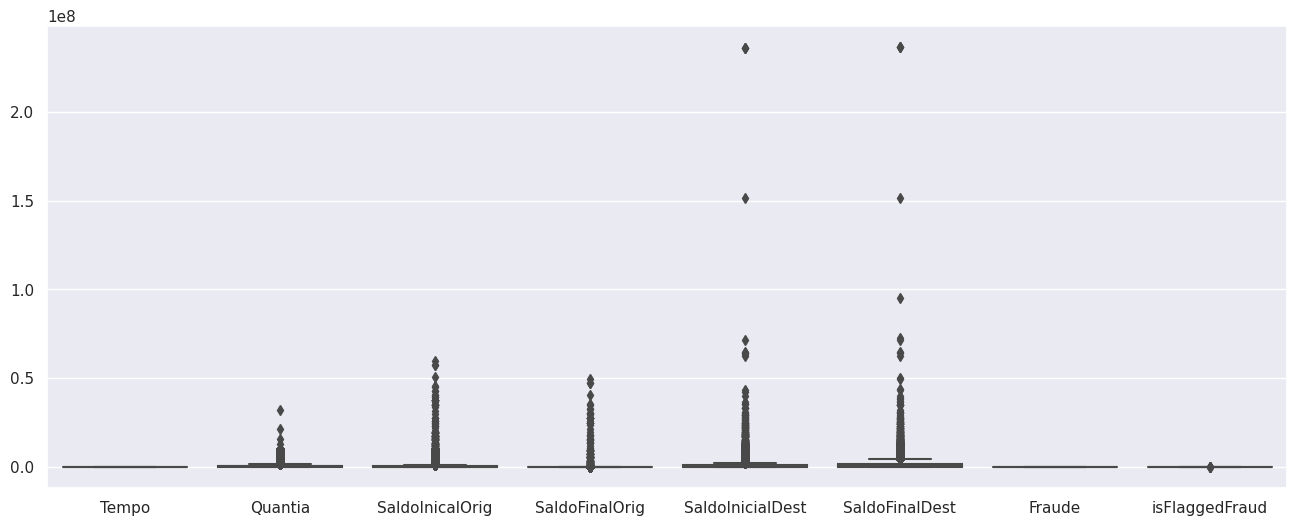

In [ ]:
# Gerando um BoxPlot de todas variaveis
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = amostra_uniforme_raw2)

In [7]:
amostra_uniforme_raw2.describe().T


,count,mean,std,min,25%,50%,75%,max
Passos,16000.00,307.47,193.70,1.00,162.00,284.00,411.00,743.00
Quantia,16000.00,823760.09,1869088.73,0.00,37020.23,168357.82,541648.30,23407621.44
SaldoInicalOrig,16000.00,1257699.09,3312531.22,0.00,10348.75,117683.42,802437.01,59585040.37
SaldoFinalOrig,16000.00,540326.97,2578045.19,0.00,0.00,0.00,0.00,49585040.37
SaldoInicialDest,16000.00,833928.68,3324540.72,0.00,0.00,0.00,513019.53,236230516.82
SaldoFinalDest,16000.00,1265022.87,3736136.57,0.00,0.00,120499.29,1082946.61,236726494.66
Fraude,16000.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
SinalizadaFraude,16000.00,0.00,0.03,0.00,0.00,0.00,0.00,1.00


In [8]:
amostra_uniforme_raw2.columns

Index(['Passos', 'Tipo', 'Quantia', 'ClienteOrigem', 'SaldoInicalOrig',
       'SaldoFinalOrig', 'ClienteDest', 'SaldoInicialDest', 'SaldoFinalDest',
       'Fraude', 'SinalizadaFraude', 'maior_50%', 'poder_compra',
       'tipo_transacao'],
      dtype='object')

#### 5.1 - NORMALIZAÇÃO

Normalização:

A normalização é um processo de transformação dos valores de uma variável para uma escala entre 0 e 1. Esse método é útil quando as variáveis têm escalas diferentes e você deseja colocá-las em uma mesma faixa. Isso é especialmente importante para algoritmos que são sensíveis à escala dos dados, como algoritmos de gradiente descendente.

Use a normalização quando:

<ol><li>As variáveis têm escalas diferentes.</li>
<li>Deseja-se restringir os valores das variáveis para uma faixa entre 0 e 1.</li>
<li>Desvio Padrão BAIXO</li>
<li>Normalização não se adapta muito bem com variáveis com muito outilers</li></ol>

<blockquote>MESMO IDENTIFICANDO AS VARIÁVEIS NUMÉRICAS COM ESCALAS DIFERENTES, VERIFICAMOS DESVIO PADRÃO ALTO E OUTILIERS TAMBÉM MUITO ALTOS, PERCEBEMOS UM RANGE (DISTÂNCIA ENTRE O MIN E MAX) MUITO GRANDE. </blockquote>
<blockquote>---------------------------------------------------------------------------------------------</blockquote>

<blockquote>CONCLUÍMOS QUE O MÉTODO DE NORMALIZAÇÃO É IMPROPRIO PARA APLICAR NA NOSSA BASE</blockquote>

<blockquote>---------------------------------------------------------------------------------------------</blockquote>

#### 5.2 - PADRONIZAÇÃO

Padronização:

A padronização é um processo de transformação dos valores de uma variável de forma que ela tenha média zero e desvio padrão igual a 1.

Esse método é útil quando as variáveis têm diferentes escalas e distribuições, e você deseja transformá-las em uma distribuição normal padrão (média 0 e desvio padrão 1).

Use a padronização quando:

<ol><li>As variáveis têm diferentes escalas e distribuições.</li>
<li>O algoritmo de machine learning utilizado se beneficia de ter as variáveis em uma distribuição normal padrão.</li>
<li>A Padronização é ideal para variáveis de Desvio Padrão muito altos</li>
<li>Padronização se adapta muito bem com variáveis com muitos outilers</li></ol>

Nesse nosso Dataset, verificando as melhores condições para utilizar a Padronização, concluímos que:


<blockquote>PERCEBEMOS CLARAMENTE QUE NOSSO DATASET SE ENQUADRA NAS CARACTERÍSTICAS QUE O MÉTODO SUPORTA.</blockquote>

<blockquote>---------------------------------------------------------------------------------------------</blockquote>

<blockquote>ENTÃO UTILIZAREMOS A PADRONIZAÇÃO COMO MÉTODO MAIS EFICAZ PARA ESCALONAMENTO DAS NOSSAS VARIÁVEIS</blockquote>


<blockquote>---------------------------------------------------------------------------------------------</blockquote>



#### REALIZANDO A PADRONIZAÇÃO DOS DADOS NUMÉRICOS

In [9]:
rs = RobustScaler()
"""num_cols = ['Tempo','Quantia', 'SaldoInicalOrig', 'SaldoFinalOrig', 'SaldoInicialDest', 'SaldoFinalDest']
amostra_uniforme_raw2['Passos'] = rs.fit_transform(amostra_uniforme_raw2['Passos'])

label_encoder = LabelEncoder()"""

amostra_uniforme_raw2['Passos'] = rs.fit_transform(amostra_uniforme_raw2[['Passos']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/passos_scaler.pkl', 'wb'))
amostra_uniforme_raw2['Quantia'] = rs.fit_transform(amostra_uniforme_raw2[['Quantia']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/quantia_scaler.pkl', 'wb'))
amostra_uniforme_raw2['SaldoInicalOrig'] = rs.fit_transform(amostra_uniforme_raw2[['SaldoInicalOrig']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/saldoinicialorig_scaler.pkl', 'wb'))
amostra_uniforme_raw2['SaldoInicialDest'] = rs.fit_transform(amostra_uniforme_raw2[['SaldoInicialDest']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/saldoinicialdest_scaler.pkl', 'wb'))
amostra_uniforme_raw2['SaldoFinalDest'] = rs.fit_transform(amostra_uniforme_raw2[['SaldoFinalDest']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/saldofinaldest_scaler.pkl', 'wb'))




In [10]:
amostra_uniforme_raw2.head()

,Passos,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,SinalizadaFraude,maior_50%,poder_compra,tipo_transacao
0,-0.13,PAYMENT,-0.24,C924650864,-0.13,0.00,M1322207143,0.00,-0.11,0,0,yes,alta,C para M
1,0.37,CASH_OUT,-0.19,C1615938753,-0.15,0.00,C1776151030,1.61,0.72,0,0,yes,baixa,C para C
2,0.07,CASH_OUT,-0.11,C1999590191,-0.14,0.00,C2034915839,1.20,0.56,0,0,yes,medio,C para C
3,0.10,TRANSFER,0.76,C271341901,-0.06,0.00,C1137099006,0.00,0.40,0,0,yes,alta,C para C
4,-0.14,CASH_OUT,-0.30,C954538139,-0.09,31145.92,C720543448,2.31,1.00,0,0,no,alta,C para C


#### 5.3 - TRANSFORMAÇÃO

In [11]:
# Realizando LabelEncoding para 'poder_compra' e 'maior_50'
le = LabelEncoder()
amostra_uniforme_raw2['poder_compra'] = le.fit_transform(amostra_uniforme_raw2[['poder_compra']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/poder_compra_label.pkl', 'wb'))
amostra_uniforme_raw2['maior_50%'] = le.fit_transform(amostra_uniforme_raw2[['maior_50%']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/maior_50_label.pkl', 'wb'))
amostra_uniforme_raw2['Tipo'] = le.fit_transform(amostra_uniforme_raw2[['Tipo']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/tipo_label.pkl', 'wb'))
amostra_uniforme_raw2['tipo_transacao'] = le.fit_transform(amostra_uniforme_raw2[['tipo_transacao']])
pickle.dump(rs, open('/home/valmir/Documentos/deteccao_fraude/parameter/tipo_transacao_label.pkl', 'wb'))

# type
#amostra_uniforme_raw2 = pd.get_dummies(amostra_uniforme_raw2, prefix='Tipo', columns=['Tipo'])

# type_transaction
#amostra_uniforme_raw2 = pd.get_dummies(amostra_uniforme_raw2, prefix='tipo_transacao', columns=['tipo_transacao'])


/home/valmir/.cache/pypoetry/virtualenvs/deteccao-fraude-h0R5dIS5-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/valmir/.cache/pypoetry/virtualenvs/deteccao-fraude-h0R5dIS5-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/valmir/.cache/pypoetry/virtualenvs/deteccao-fraude-h0R5dIS5-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/valmir/.ca

In [12]:
amostra_uniforme_raw2.shape

(16000, 14)

In [13]:
amostra_uniforme_raw2.head()

,Passos,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,SinalizadaFraude,maior_50%,poder_compra,tipo_transacao
0,-0.13,3,-0.24,C924650864,-0.13,0.00,M1322207143,0.00,-0.11,0,0,1,0,1
1,0.37,1,-0.19,C1615938753,-0.15,0.00,C1776151030,1.61,0.72,0,0,1,1,0
2,0.07,1,-0.11,C1999590191,-0.14,0.00,C2034915839,1.20,0.56,0,0,1,2,0
3,0.10,4,0.76,C271341901,-0.06,0.00,C1137099006,0.00,0.40,0,0,1,0,0
4,-0.14,1,-0.30,C954538139,-0.09,31145.92,C720543448,2.31,1.00,0,0,0,0,0


##### 5.3.1 - VARIAVEIS DEPEDENTES


##### 5.3.2 - VARIAVEL RESPOSTA

## 6 - SELEÇÃO DE FEATURES

### 6.1 - ESCOLHENDO AS VARIAVEIS RELEVANTES

In [ ]:
amostra_uniforme_raw3 = amostra_uniforme_raw2.copy()
amostra_uniforme_raw3.to_csv(HOME_PATH+INTERIM_DATA_PATH+'amostra_uniforme_raw3.csv')
amostra_uniforme_raw3 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'amostra_uniforme_raw3.csv')

In [ ]:
del amostra_uniforme_raw3['Unnamed: 0']
amostra_uniforme_raw3.columns

Index(['Tempo', 'Tipo', 'Quantia', 'ClienteOrigem', 'SaldoInicalOrig',
       'SaldoFinalOrig', 'ClienteDest', 'SaldoInicialDest', 'SaldoFinalDest',
       'Fraude', 'isFlaggedFraud', 'maior_50%', 'poder_compra',
       'tipo_transacao_0'],
      dtype='object')

### 6.2 - DIVISÃO TREINO, VALIDAÇÃO E TESTE

In [ ]:
# Dividir a base de dados em treino, validação e teste usando amostragem estratificada
X = amostra_uniforme_raw3.drop(['Fraude', 'ClienteOrigem', 'ClienteDest'], axis=1)  # Variáveis preditoras
y = amostra_uniforme_raw3['Fraude']  # Variável alvo

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)


NameError: ignored

In [ ]:
print(X_train.shape)
print(X_val.shape)



(11200, 11)
(4800, 11)


In [ ]:
X_train.descrbe()

,Tempo,Tipo,Quantia,SaldoInicalOrig,SaldoFinalOrig,SaldoInicialDest,SaldoFinalDest,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
13079,-0.50,1,2.05,2.76,0.00,-0.15,-0.29,0,0,0,0
9207,0.94,0,-0.12,0.24,0.00,0.95,0.42,0,0,0,0
7413,-0.60,0,-0.05,-0.08,0.00,0.47,0.18,0,1,0,0
15263,0.18,1,12.28,14.62,0.00,-0.15,-0.29,0,0,0,0
3878,0.19,0,-0.25,0.26,72051.70,0.14,0.04,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3468,-0.21,0,0.09,-0.14,0.00,5.46,2.99,0,1,1,0
11307,-0.94,1,2.73,3.54,0.00,-0.15,-0.29,0,0,0,0
3402,-0.30,0,0.03,-0.14,0.00,2.50,1.22,0,1,1,0
12130,0.59,0,-0.01,0.37,0.00,-0.14,-0.15,0,0,0,0


In [ ]:
with open('/content/drive/MyDrive/DETECCAO_FRAUDE/data/raw/base_fraude_dividida.pkl', mode = 'wb')as f:
    pickle.dump([X_train, X_val, y_train, y_val ], f)

In [ ]:
with open('/content/drive/MyDrive/DETECCAO_FRAUDE/data/raw/base_fraude_dividida.pkl', 'rb') as f:
   X_train, X_val, y_train, y_val   = pickle.load(f)

In [ ]:
X_train.describe()

,Tempo,Tipo,Quantia,SaldoInicalOrig,SaldoFinalOrig,SaldoInicialDest,SaldoFinalDest,isFlaggedFraud,maior_50%,poder_compra
count,11200.00,11200.00,11200.00,11200.00,11200.00,11200.00,11200.00,11200.00,11200.00,11200.00
mean,0.08,0.34,1.27,1.72,93931.58,1.05,0.71,0.00,0.43,0.41
std,0.79,0.47,3.65,5.85,1351771.51,4.73,2.87,0.02,0.49,0.60
min,-1.15,0.00,-0.45,-0.14,0.00,-0.15,-0.29,0.00,0.00,0.00
25%,-0.50,0.00,-0.25,-0.14,0.00,-0.15,-0.29,0.00,0.00,0.00
50%,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
75%,0.50,1.00,0.77,0.88,0.00,0.85,0.72,0.00,1.00,1.00
max,1.88,1.00,61.53,129.06,47316255.05,257.04,142.60,1.00,1.00,2.00


## 7.0 - MODELAR ALGORITIMOS DE MACHINE LEARNING

In [ ]:
''' amostra_uniforme_raw5 = amostra_uniforme_raw4.copy()
amostra_uniforme_raw5.to_csv(HOME_PATH+INTERIM_DATA_PATH+'amostra_uniforme_raw5.csv') '''
amostra_uniforme_raw5 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'amostra_uniforme_raw5.csv')

In [ ]:
amostra_uniforme_raw5

,Unnamed: 0.1,Unnamed: 0,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
0,0,0,0.47,0,0.27,C971920685,-0.14,0.00,C1146687959,0.38,0.23,0,0,1,1,0
1,1,1,-1.09,0,-0.36,C1493466454,-0.07,0.00,C1917089525,1.14,0.77,0,0,0,0,0
2,2,2,1.66,1,-0.34,C1535433323,-0.12,0.00,C1921654827,0.99,0.38,0,0,1,2,0
3,3,3,-0.43,0,-0.13,C126201328,-0.14,0.00,C1395563207,0.07,-0.07,0,0,1,1,0
4,4,4,1.27,0,-0.18,C713551024,-0.14,0.00,C974810322,0.24,0.01,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,15995,-0.57,0,0.74,C1830172898,1.24,0.00,C1813501651,0.19,0.27,1,0,0,0,0
15996,15996,15996,1.22,0,-0.21,C333294363,0.13,0.00,C1007502617,-0.06,-0.16,1,0,0,0,0
15997,15997,15997,0.00,0,0.99,C1523298482,1.53,0.00,C1232537312,-0.07,0.26,1,0,0,0,0
15998,15998,15998,0.87,1,0.45,C328303267,0.90,0.00,C1304018729,-0.15,-0.29,1,0,0,0,0


In [ ]:
X_train

,Tempo,Tipo,Quantia,SaldoInicalOrig,SaldoFinalOrig,SaldoInicialDest,SaldoFinalDest,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao_0
13079,-0.50,1,2.05,2.76,0.00,-0.15,-0.29,0,0,0,True
9207,0.94,0,-0.12,0.24,0.00,0.95,0.42,0,0,0,True
7413,-0.60,0,-0.05,-0.08,0.00,0.47,0.18,0,1,0,True
15263,0.18,1,12.28,14.62,0.00,-0.15,-0.29,0,0,0,True
3878,0.19,0,-0.25,0.26,72051.70,0.14,0.04,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
3468,-0.21,0,0.09,-0.14,0.00,5.46,2.99,0,1,1,True
11307,-0.94,1,2.73,3.54,0.00,-0.15,-0.29,0,0,0,True
3402,-0.30,0,0.03,-0.14,0.00,2.50,1.22,0,1,1,True
12130,0.59,0,-0.01,0.37,0.00,-0.14,-0.15,0,0,0,True


### 7.1 - MODELO DE REFERNCIA

In [ ]:
y_val


13231    1
4858     0
8675     1
12545    1
13759    1
        ..
14441    1
1542     0
4079     0
13742    1
5000     0
Name: Fraude, Length: 4800, dtype: int64

### 7.2 - MODELO LINEAR

#### REGRESSÃO LOGISTICA - LOGISTIC REGRESSION

,Model_name,Balanced_accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.81,0.83,0.77,0.80


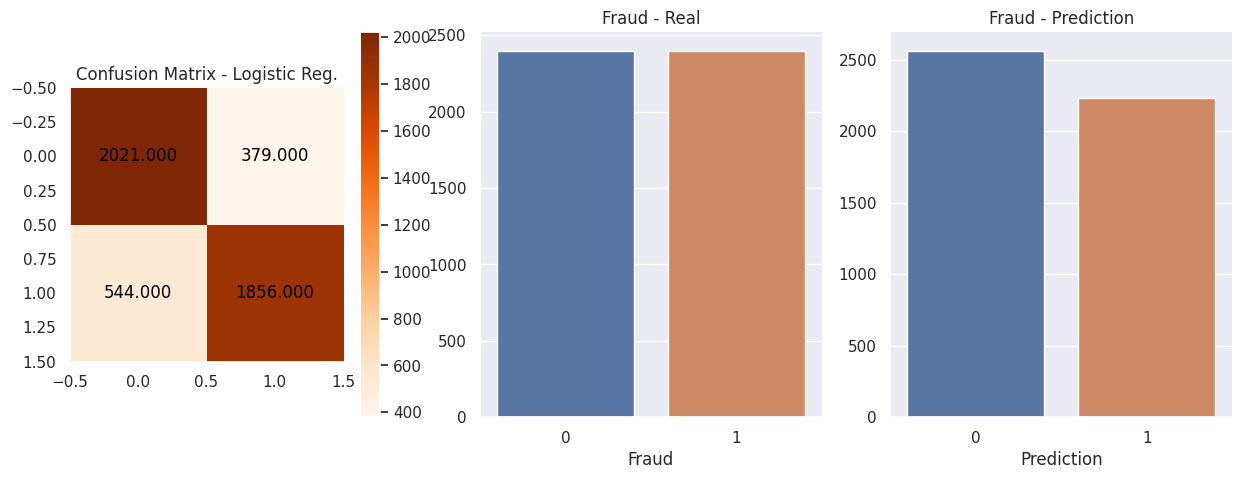

In [ ]:
# define Logistic Regression
lr = LogisticRegression()

# model training
lr_trained = lr.fit(X_train, y_train)

# predict with validation
previsoes_lr = lr_trained.predict(X_val)

# compute metric
metrics_lr = compute_metrics(model_name='Logistic Regression', y_validation=y_val, yhat=previsoes_lr)

# show graph
plot_metric(y_val, previsoes_lr, 'Logistic Reg.')

# show metric
metrics_lr


### 7.3 - MODELO NÃO LINEAR

#### - RANDOM FOREST - FLORESTA RANDOMIZA

,Model_name,Balanced_accuracy,Precision,Recall,F1-score
0,Random Forest,0.97,0.95,0.99,0.97


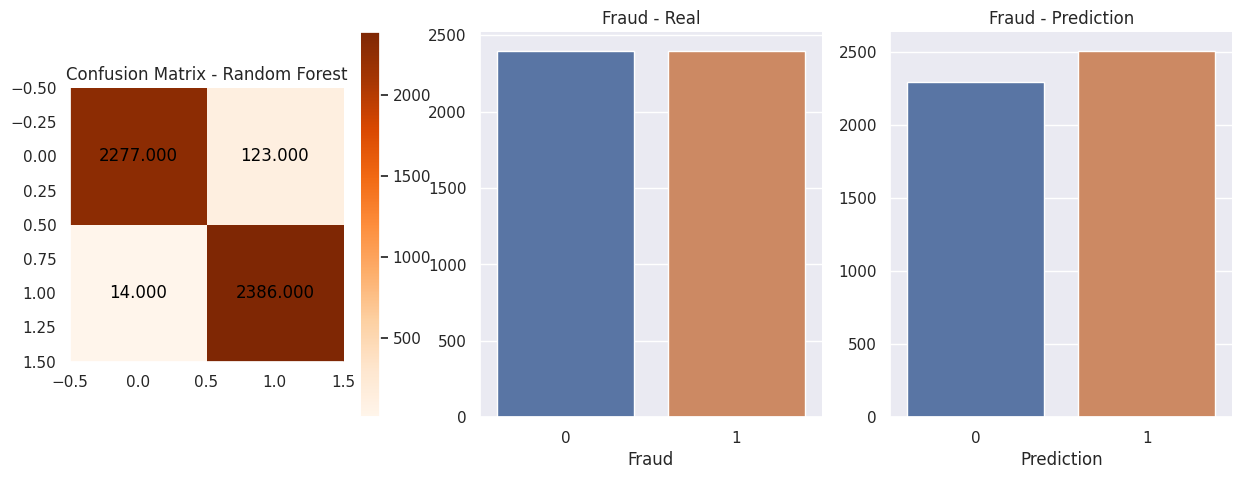

In [ ]:
# define Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

# model training
rf_trained = rf.fit(X_train, y_train)

# predict with validation
previsoes_rf = rf_trained.predict(X_val)

# compute metric
metrics_rf = compute_metrics(model_name='Random Forest', y_validation=y_val, yhat=previsoes_rf)

# show graph
plot_metric(y_val, previsoes_rf, 'Random Forest')

# show metric
metrics_rf

### - XGBosst

,Model_name,Balanced_accuracy,Precision,Recall,F1-score
0,XGBost,0.98,0.96,1.00,0.98


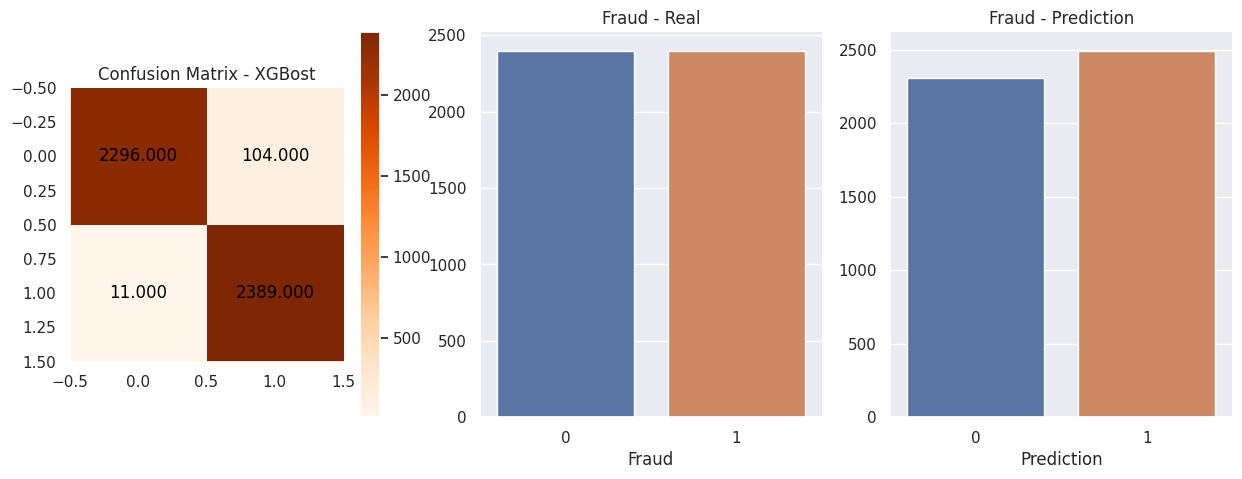

In [ ]:
# define XGBoost
xgboost = xgb.XGBClassifier(n_estimators=5)

# model training
xgboost_trained = xgboost.fit(X_train, y_train)

# predict with validation
previsoes_xgb = xgboost_trained.predict(X_val)

# compute metric
metrics_xgb = compute_metrics(model_name='XGBost', y_validation=y_val, yhat=previsoes_xgb)

# show graph
plot_metric(y_val, previsoes_xgb, 'XGBost')

# show metric
metrics_xgb

### 7.4.1 - DESEMPENHO INDIVUDUAL

#### REGRESSÃO LOGISTICA

In [ ]:
class_rl = classification_report(y_val, previsoes_lr)
print(class_rl)


              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2400
           1       0.83      0.77      0.80      2400

    accuracy                           0.81      4800
   macro avg       0.81      0.81      0.81      4800
weighted avg       0.81      0.81      0.81      4800



#### RANDOM FOREST

In [ ]:
class_rf = classification_report(y_val, previsoes_rf)
print(class_rf)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2400
           1       0.95      0.99      0.97      2400

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



#### XGBoost

In [ ]:
class_xgb = classification_report(y_val, previsoes_xgb)
print(class_xgb)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2400
           1       0.96      1.00      0.98      2400

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



### 7.4.2 - DESEMPEHHO REAL

#### REGRESSÃO LOGISTICA

In [ ]:
clf = LogisticRegression()

skl = StratifiedKFold(n_splits=10)

scores = cross_val_score(clf, X_train, y_train, cv=skl)

print("Scores em cada fold:", scores)
print("Média dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

print('CV(coeficiente de variação) :', )

Scores em cada fold: [0.828 0.811 0.8   0.823 0.808 0.814 0.821 0.813 0.822 0.812]
Média dos scores: 0.8152678571428572
Desvio padrão dos scores: 0.007930360962780922
CV(coeficiente de variação) :


#### RANDOM FOREST

In [ ]:
clf = RandomForestClassifier(max_features='sqrt', n_estimators=10, max_depth=5)

skl = StratifiedKFold(n_splits=10)

scores = cross_val_score(clf, X_train, y_train, cv=skl)

print("Scores em cada fold:", scores)
print("Média dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

print('CV(coeficiente de variação) :', (scores.std() / scores.mean()) * 100)

Scores em cada fold: [0.965 0.976 0.973 0.97  0.971 0.976 0.961 0.975 0.979 0.971]
Média dos scores: 0.9717857142857144
Desvio padrão dos scores: 0.00525497820341504
CV(coeficiente de variação) : 0.5407548316634366


#### XGBoost

In [ ]:
clf = xgb.XGBClassifier(scoring='roc_auc_score')

skl = StratifiedKFold(n_splits=10)

scores = cross_val_score(clf, X_train, y_train, cv=skl)

print("Scores em cada fold:", scores)
print("Média dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

print('CV(coeficiente de variação) :', (scores.std() / scores.mean()) * 100)
print("ROC AUC no conjunto de teste:", roc_auc_score)

[13:22:50] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:22:55] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:22:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:00] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:01] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:01] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:02] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:06] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:08] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:23:09] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.

Scores em cada fold: [0.989 0.993 0.993 0.991 0.992 0.994 0.993 0.989 0.991 0.992]
Média dos scores: 0.9916964285714286
Desvio padrão dos scores: 0.00

## 8.0 - AJUSTE DE HIPERPARAMETROS

Imagine que você está ensinando um computador a reconhecer gatos e cachorros em fotos. Um modelo de machine learning é como um aluno que aprende com exemplos. Os hiperparâmetros são como as configurações do aluno, que afetam a rapidez e a qualidade do aprendizado.

Ajustar hiperparâmetros é como encontrar as melhores configurações para que o aluno (modelo) aprenda da melhor forma possível. Isso é importante porque diferentes configurações podem levar a resultados muito diferentes.

Um método chamado Random Search é como testar várias opções de configuração de forma aleatória. Imagine que você está tentando achar o melhor jeito de estudar: você tentaria estudar em diferentes horários, com diferentes materiais, até encontrar o método que mais te ajuda a aprender.

Da mesma forma, o Random Search testa várias configurações para encontrar as melhores para o modelo. Isso ajuda a economizar tempo e a conseguir um modelo mais eficaz, que pode reconhecer gatos e cachorros nas fotos com mais precisão. Portanto, ajustar hiperparâmetros é como encontrar a melhor receita para o sucesso do modelo de machine learning.






### 8.1 - BUSCA ALEATORIO OU RANDOM SEARCH

In [ ]:
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'n_estimators': range(100, 1000, 100)
}

In [ ]:
# Inicializar o RandomizedSearchCV
random_search = RandomizedSearchCV(xgboost, param_distributions=param_dist, n_iter=5,
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)

# Realizar a busca de hiperparâmetros
random_search.fit(X_train)

# Melhores hiperparâmetros encontrados
best_params = random_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Avaliar o modelo nos dados de teste
y_pred = random_search.predict(X_val)
''' roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC no conjunto de teste:", roc_auc_score) '''

Fitting 5 folds for each of 5 candidates, totalling 25 fits


BrokenProcessPool: ignored

ABAIXO ESTÃO OS HIPERPARMENTROS QUE O METODO SUGERIU PARA QUE SEJA UTILIZADO NO MODELO FINAL A FIM DE MELHORAR NOSSO RESULTADO



subsample=0.6,
                                  n_estimators=200,
                                  min_child_weight=3,
                                  max_depth=8,
                                  learning_rate=0.2677777777777778,
                                  colsample_bytree=1.0

### 8.2 - MODELO FINAL

In [ ]:
xgboost_final = xgb.XGBClassifier(subsample=0.8,
                                  n_estimators=3000,
                                  min_child_weight=3,
                                  max_depth=500,
                                  learning_rate=0.2677777777777778,
                                  colsample_bytree=1.0)

xgboost_trained_final = xgboost_final.fit(X_val, y_val)

,Model_name,Balanced_accuracy,Precision,Recall,F1-score
0,XGBost,1.00,1.00,1.00,1.00


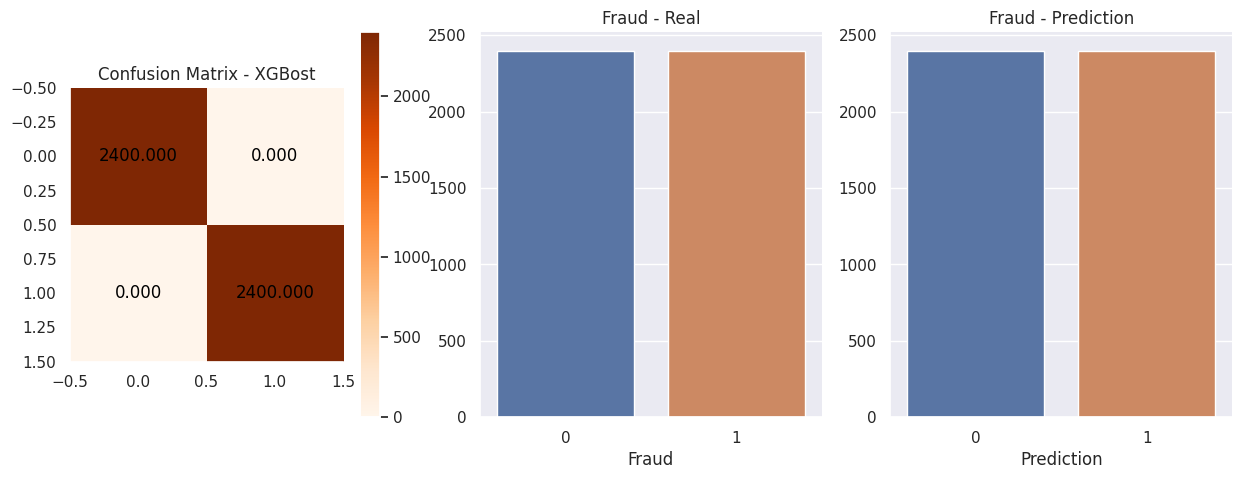

In [ ]:
# define XGBoost
xgboost_final_02 = xgb.XGBClassifier(subsample=0.8,
                            n_estimators=3000,
                            min_child_weight=3,
                            max_depth=500,
                            learning_rate=0.2677777777777778,
                            colsample_bytree=1.0)

# model training
xgboost_trained = xgboost_final_02.fit(X_val, y_val)

# predict with validation
previsoes_xgb = xgboost_trained.predict(X_val)

# compute metric
metrics_xgb = compute_metrics(model_name='XGBost', y_validation=y_val, yhat=previsoes_xgb)

# show graph
plot_metric(y_val, previsoes_xgb, 'XGBost')

# show metric
metrics_xgb

### 8.3 - TESTE DO MODELO FINAL

Como realizei varias alterações no dataset de treino, será preciso realizar essas mesmas alterações no dataset de teste a fim que o mesmo fique proporcional ao de treino


In [ ]:
base_teste_final = pd.read_csv('/content/drive/MyDrive/DETECCAO_FRAUDE/data/intermediario/base_fraude_raw_teste')
del base_teste_final['Unnamed: 0']
base_teste_final.head(), base_teste_final.shape

(   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
 0   281   PAYMENT    9617.79   C796492796       22449.00        12831.21   
 1    13   PAYMENT   41655.37   C562142861       51871.00        10215.63   
 2   686   CASH_IN    1007.76  C1325854774     9015430.80      9016438.56   
 3   378  CASH_OUT   70496.69  C1310223779           0.00            0.00   
 4   163  TRANSFER 1043578.63  C1584700437       18583.00            0.00   
 
       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0  M1391639231            0.00            0.00        0               0  
 1  M1595316801            0.00            0.00        0               0  
 2  C1891405124       193766.01       192758.25        0               0  
 3  C1335600187      1263782.22      1334278.91        0               0  
 4  C1574443484       237460.55      1281039.18        0               0  ,
 (1272524, 11))

### 8.3.1 - RENOMEAR FEATURES DO DATASET TESTE

In [ ]:
base_teste_final.rename(columns={'step':'Tempo', 'type':'Tipo', 'amount': 'Quantia',
                                'nameOrig':'ClienteOrigem', 'oldbalanceOrg': 'SaldoInicalOrig',
                                'newbalanceOrig':'SaldoFinalOrig', 'nameDest':'ClienteDest',
                                'oldbalanceDest':'SaldoInicialDest', 'newbalanceDest':'SaldoFinalDest',
                                'isFraud':'Fraude'}, inplace=True)

### 8.3.2 - FEATURES ENGINNEERING DO DATASET TESTE

In [ ]:
base_teste_final['maior_50%'] = base_teste_final[['Quantia', 'SaldoInicalOrig']].apply(
    lambda x: 'yes' if x['Quantia'] / 2 > x['SaldoInicalOrig'] else 'no', axis=1)


base_salarial = 3800
media_salarial = base_teste_final['SaldoInicalOrig'].median()

base_teste_final['poder_compra'] = base_teste_final['SaldoInicalOrig'].apply(
    lambda x: 'baixa' if x <= base_salarial else 'medio'
                      if x > base_salarial and x <= media_salarial else 'alta')


base_teste_final['tipo_transacao'] = base_teste_final[['ClienteOrigem', 'ClienteDest']].apply(
    lambda x: 'C para C' if x['ClienteOrigem'][0] == 'C' and x['ClienteDest'][0] == 'C' else 'M para M'
                         if x['ClienteOrigem'][0] == 'M' and x['ClienteDest'][0] == 'M' else 'C para M'
                         if x['ClienteOrigem'][0] == 'C' and x['ClienteDest'][0] == 'M' else 'M para C'
                         if x['ClienteOrigem'][0] == 'M' and x['ClienteDest'][0] == 'C' else None, axis=1)

In [ ]:
base_teste_final.head()

,Tempo,Tipo,Quantia,ClienteOrigem,SaldoInicalOrig,SaldoFinalOrig,ClienteDest,SaldoInicialDest,SaldoFinalDest,Fraude,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao
0,281,PAYMENT,9617.79,C796492796,22449.00,12831.21,M1391639231,0.00,0.00,0,0,no,alta,C para M
1,13,PAYMENT,41655.37,C562142861,51871.00,10215.63,M1595316801,0.00,0.00,0,0,no,alta,C para M
2,686,CASH_IN,1007.76,C1325854774,9015430.80,9016438.56,C1891405124,193766.01,192758.25,0,0,no,alta,C para C
3,378,CASH_OUT,70496.69,C1310223779,0.00,0.00,C1335600187,1263782.22,1334278.91,0,0,yes,baixa,C para C
4,163,TRANSFER,1043578.63,C1584700437,18583.00,0.00,C1574443484,237460.55,1281039.18,0,0,yes,alta,C para C


### 8.3.3 - PADRONIZAÇÃO DO DATASET TESTE

In [ ]:
scaler = RobustScaler()
num_cols = ['Tempo','Quantia', 'SaldoInicalOrig', 'SaldoFinalOrig', 'SaldoInicialDest', 'SaldoFinalDest']
base_teste_final[num_cols] = scaler.fit_transform(base_teste_final[num_cols])

### 8.3.1 - TRANSFORMAÇÃO USANDO LABEL ENCODER DO DATASET TESTE

In [ ]:
# Realizando LabelEncoding para 'poder_compra' e 'maior_50'
label_encoder = LabelEncoder()
base_teste_final['poder_compra'] = label_encoder.fit_transform(base_teste_final['poder_compra'])
base_teste_final['maior_50%'] = label_encoder.fit_transform(base_teste_final['maior_50%'])
base_teste_final['Tipo'] = label_encoder.fit_transform(base_teste_final['Tipo'])
base_teste_final['tipo_transacao'] = label_encoder.fit_transform(base_teste_final['tipo_transacao'])

# type
#amostra_uniforme_raw2 = pd.get_dummies(amostra_uniforme_raw2, prefix='Tipo', columns=['Tipo'])

# type_transaction
base_teste_final = pd.get_dummies(base_teste_final, prefix='tipo_transacao', columns=['tipo_transacao'])

### 8.3.4 - DIVISÃO DO DATASET TESTE

In [ ]:
# Dividir a base de dados em treino, validação e teste usando amostragem estratificada
X_teste = base_teste_final.drop(['Fraude', 'ClienteOrigem', 'ClienteDest'], axis=1)  # Variáveis preditoras
y_teste = base_teste_final['Fraude']  # Variável alvo




In [ ]:
X_teste.head()

,Tempo,Tipo,Quantia,SaldoInicalOrig,SaldoFinalOrig,SaldoInicialDest,SaldoFinalDest,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao_0,tipo_transacao_1
0,0.23,3,-0.33,0.08,0.09,-0.14,-0.19,0,0,0,0,1
1,-1.26,3,-0.17,0.35,0.07,-0.14,-0.19,0,0,0,0,1
2,2.50,0,-0.38,83.90,62.59,0.07,-0.02,0,0,0,1,0
3,0.78,1,-0.02,-0.13,0.00,1.20,1.01,0,1,1,1,0
4,-0.42,4,4.96,0.04,0.00,0.11,0.96,0,1,0,1,0


### 8.3.5 - EXCLUSÃO DA FEATURES DO DATASET TESTE PARA EQUIPARAR A QUANTIDADE AO DE TREINO

In [ ]:
del X_teste['tipo_transacao_1']
X_teste.head()

,Tempo,Tipo,Quantia,SaldoInicalOrig,SaldoFinalOrig,SaldoInicialDest,SaldoFinalDest,isFlaggedFraud,maior_50%,poder_compra,tipo_transacao_0
0,0.23,3,-0.33,0.08,0.09,-0.14,-0.19,0,0,0,0
1,-1.26,3,-0.17,0.35,0.07,-0.14,-0.19,0,0,0,0
2,2.50,0,-0.38,83.90,62.59,0.07,-0.02,0,0,0,1
3,0.78,1,-0.02,-0.13,0.00,1.20,1.01,0,1,1,1
4,-0.42,4,4.96,0.04,0.00,0.11,0.96,0,1,0,1


In [ ]:
X_teste.shape, y_teste.shape

((1272524, 11), (1272524,))

In [ ]:
with open('/content/drive/MyDrive/DETECCAO_FRAUDE/data/raw/df_teste_ajustado.pkl', mode = 'wb')as f:
    pickle.dump([X_teste, y_teste], f)

In [ ]:
with open('/content/drive/MyDrive/DETECCAO_FRAUDE/data/raw/df_teste_ajustado.pkl', 'rb') as f:
  X_teste, y_teste   = pickle.load(f)

### 8.3.6 - PREVISÃO E DESEMPENHO DO DATASET TESTE

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, ConfusionMatrixDisplay


In [ ]:
# Fazer previsões usando o modelo
y_pred = xgboost_final.predict(X_teste)

# Avaliar o desempenho
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia no conjunto de teste: {acuracia:.2f}")

#Matriz de confusão
metrica_xgb = confusion_matrix(y_teste, y_pred)


Acurácia: 0.6366



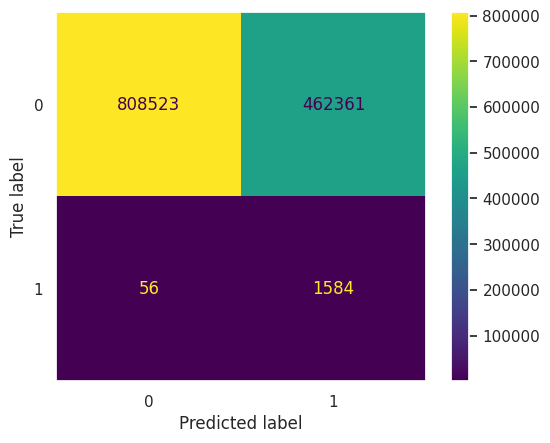

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.6362    0.7776   1270884
           1     0.0034    0.9659    0.0068      1640

    accuracy                         0.6366   1272524
   macro avg     0.5017    0.8010    0.3922   1272524
weighted avg     0.9986    0.6366    0.7766   1272524



In [ ]:
print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste, y_pred)))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_teste, y_pred)).plot()
plt.grid(False)
plt.show()

print("Relatório de Classificação:\n", classification_report(y_teste, y_pred, digits=4))




## - 9.0 - TRADUÇÃO E INTERPRETAÇÃO DO ERRO

- explicar features como projeto anterior de fraude

Para conseguir traduzir e interpretar os erros, partirei da primissa que será necessario continuar a entender e analisar o dataset um pouco mais a fundo.

Nesse contexto o primeiro passo é realmente encontrar uma média satisfatoria dos valores das transações.

Devidp ao gritante outlier dessa variavel, decidi utilizar de `MEDIDAS DE TENDÊNCIA CENTRAL`que nada mais é uma medida mais robusta para tratar com esses outliers não enviesados. Poderia utilizar da `MEDIANA`mais irei utilizar a media.

Existem duas medias que possam se encaixar nesse problema, que são:

* `MÉDIA TRUNCADA`- Utiliza a retirada em proporção de porcetagem indicada os valores menores e ao mesmo tempo maiores que estão na feature. Como de exemplo, 5% dos valores menores e 5% dos valores maiores e o que sobre realiza a média.

* `MÉDIA CORTADA`- Utiliza o corte em proporção de valor inteiro indicado dos resultados menores e ao mesmo tempo maiores que estão na feature. Como de exemplo, cortar 1000 resultados dos valores menores e 1000 resultados dos valores maiores e o que sobre realiza a média.

Assim teremos médias um pouco mais proxima da realidade.

##### MÉDIA TRUNCADA - UTILIZANDO 35% DE CORTE

In [ ]:
# Supondo que df seja o seu DataFrame e 'amount' seja a coluna de interesse
data = base_fraude_raw['amount']

# Ordenar os valores
data_sorted = np.sort(data)

# Definir a porcentagem de valores a serem removidos em cada extremidade
trim_percentage = 0.35

# Calcular o número de valores a serem removidos em cada extremidade
trim_count = int(len(data_sorted) * trim_percentage)

# Remover os valores das extremidades
trimmed_data = data_sorted[trim_count:-trim_count]

# Calcular a média truncada
truncated_mean = np.mean(trimmed_data)


###### RESULTADO MÉDIA TRUNCADA

In [ ]:
print(truncated_mean)

78446.25123459628


#### MÉDIA CORTADA - USANDO 50 MIL DE CORTE

In [ ]:
# Supondo que df seja o seu DataFrame e 'amount' seja a coluna de interesse
data = base_fraude_raw['amount']

# Ordenar os valores
data_sorted = np.sort(data)

# Definir a quantidade de valores a serem removidos em cada extremidade
trim_count = 50000  # Pode ser ajustado conforme necessário

# Remover os valores das extremidades
trimmed_data = data_sorted[trim_count:-trim_count]

# Calcular a média cortada
trimmed_mean = np.mean(trimmed_data)


##### RESULTADO MEDIA CORTADA

In [ ]:
print(trimmed_mean)

146685.1464084887


### 9.1 - DESEMPENHO DO NEGÓCIO

### 9.2 - DESEMPENHO TOTAL

### 9.3 - DESEMOENHO DO MODELO DE MACHINE LEARNING

## 10 - DEPLOY
 - Modulos, pacotes, funçoes, classes e api's
 - Funções de fluxo - if, for, list compreention
 - Funções espéciais - decorators e generetors
 - Type hint -

In [ ]:
def somar(x:int, y:int)->int:
  soma =  x + y
  return soma

In [ ]:
somar(2,3)


5

In [ ]:
def f(a):
    return a

In [ ]:
f(1)

1